<center><h1>Tang_Lin_HW6</h1></center>

Name: Tang Lin
<br>
Github Username: MeLinOrDoreen
<br>
USC ID: 9012859074

## 1. Tree-Based Methods

Import packages

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, mean_squared_error, mean_absolute_error
# from pROC import roc_curve, auc as roc_auc, compare_roc
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample

# to surpress warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

### (a) Download the APS Failure data

In [3]:
training_set = pd.read_csv("../Data/aps_failure_training_set.csv", skiprows= 20)
training_set.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [4]:
test_set = pd.read_csv("../Data/aps_failure_test_set.csv", skiprows= 20)
test_set.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  ...  \
0   neg      60      0     20     12      0      0      0      0      0  ...   
1   neg      82      0     68     40      0      0      0      0      0  ...   
2   neg   66002      2    212    112      0      0      0      0      0  ...   
3   neg   59816     na   1010    936      0      0      0      0      0  ...   
4   neg    1814     na    156    140      0      0      0      0      0  ...   

   ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008 ee_009 ef_000  \
0    1098     138     412     654       78      88       0      0      0   
1    1068     276    1620     116       86     462       0      0      0   
2  495076  380368  440134  269556  1315022  153680     516      0      0   
3  540820  243270  483302  485332   431376  210074  281662   3232      0   
4    7646    4144   18466   49782     3176     482      76      0      0   

  eg_000  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 171 columns]

### (b) Data Preparation

#### (i) Research what types of techniques are usually used

1. Single Imputstion
- Dropping features with high nullity
- Mean or median or other summary statistic substitution
- Model imputation: regression...
- Semi-supervised learning
- Maximum likelihood imputation (distributional assumptions are required for all variables with missingness)

2. Multiple imputation

In [5]:
# Replace all the "na" into np.nan
training_set.replace("na", np.nan, inplace= True)
test_set.replace("na", np.nan, inplace= True)

In [6]:
test_set.columns[test_set.isna().any()] # There are missing values in 169 columns in the test set

Index(['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=169)

In [7]:
training_set.columns[training_set.isna().any()] # There are missing values in 169 columns in the training set

Index(['ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=169)

In [8]:
# Define the X, y (there is no missing value for y)
X_train_mv = training_set.iloc[:, 1:]
y_train = training_set.iloc[:, 0]

X_test_mv = test_set.iloc[:, 1:]
y_test = test_set.iloc[:, 0]

In [9]:
X_column_names = list(X_train_mv.columns)

In [10]:
### Use the mean to impute the missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit(X_test_mv)
X_train_meanimp = imp_mean.fit_transform(X_train_mv)
X_test_meanimp = imp_mean.fit_transform(X_test_mv)

# Convert data sets into data frames
X_train_meanimp = pd.DataFrame(X_train_meanimp, columns= X_column_names)
X_test_meanimp = pd.DataFrame(X_test_meanimp, columns= X_column_names)

In [11]:
### I tried to use the KNN method to impute the missing values, but it takes too long
# imp_knn = KNNImputer(n_neighbors=2)
# imp_knn.fit(X_test_mv)
# X_train_knnimp = imp_knn.fit_transform(X_train_mv)
# X_test_knnimp = imp_knn.fit_transform(X_test_mv)

# # Convert data sets into data frames
# X_train_knnimp = pd.DataFrame(X_train_knnimp, columns= X_column_names)
# X_test_knnimp = pd.DataFrame(X_test_knnimp, columns= X_column_names)

In [12]:
### Use the median to impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_median.fit(X_test_mv)
X_train_medianimp = imp_median.fit_transform(X_train_mv)
X_test_medianimp = imp_median.fit_transform(X_test_mv)

# Convert data sets into data frames
X_train_medianimp = pd.DataFrame(X_train_medianimp, columns= X_column_names)
X_test_medianimp = pd.DataFrame(X_test_medianimp, columns= X_column_names)

In [13]:
X_train_medianimp

aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0       76698      0  2130706438    280      0      0      0      0      0   
1       33058      0           0      0      0      0      0      0      0   
2       41040      0         228    100      0      0      0      0      0   
3          12      0          70     66      0     10      0      0      0   
4       60874      0        1368    458      0      0      0      0      0   
...       ...    ...         ...    ...    ...    ...    ...    ...    ...   
59995  153002      0         664    186      0      0      0      0      0   
59996    2286      0  2130706538    224      0      0      0      0      0   
59997     112      0  2130706432     18      0      0      0      0      0   
59998   80292      0  2130706432    494      0      0      0      0      0   
59999   40222      0         698    628      0      0      0      0      0   

      ag_003  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384   721044   469792   339156  157956   73224   
1          0  ...   421400  178064   293306   245416   133654   81140   97576   
2          0  ...   277378  159812   423992   409564   320746  158022   95128   
3        318  ...      240      46       58       44       10       0       0   
4          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59995   2564  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59996      0  ...    10578    6760    21126    68424      136       0       0   
59997      0  ...      792     386      452      144      146    2622       0   
59998      0  ...   699352  222654   347378   225724   194440  165070  802280   
59999      0  ...   440066  183200   344546   254068   225148  158304  170384   

       ee_009 ef_000 eg_000  
0           0      0      0  
1        1500      0      0  
2         514      0      0  
3           0      4     32  
4        1218      0      0  
...       ...    ...    ...  
59995   28588      0      0  
59996       0      0      0  
59997       0      0      0  
59998  388422      0      0  
59999     158      0      0  

[60000 rows x 170 columns]

In [14]:
X_train_meanimp.dtypes

aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
ae_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 170, dtype: object

#### (ii) Calculate the coefficient of variation

In [15]:
# Combine the Xs in training and test sets (used mean imputation for missing values)
X_full_meanimp = pd.concat([X_train_meanimp, X_test_meanimp], axis = 0)
X_full_meanimp = X_full_meanimp.astype("float64")
# Get the CV
coefficient_variation_meanimp = X_full_meanimp.std() / X_full_meanimp.mean()
pd.DataFrame(coefficient_variation_meanimp, columns=["CV"]).T

aa_000    ab_000    ac_000      ad_000     ae_000     af_000    ag_000  \
CV  4.328608  2.178397  2.167648  206.786809  22.293998  18.209361  91.46552   

      ag_001     ag_002    ag_003  ...    ee_002    ee_003    ee_004  \
CV  42.08034  17.624927  8.753069  ...  2.603598  2.573276  2.625389   

      ee_005    ee_006    ee_007    ee_008    ee_009     ef_000     eg_000  
CV  2.858232  3.230981  4.885086  3.335019  5.753917  47.925135  45.648516  

[1 rows x 170 columns]

In [16]:
# Combine the Xs in training and test sets (used median imputation for missing values)
X_full_medianimp = pd.concat([X_train_medianimp, X_test_medianimp], axis = 0)
X_full_medianimp = X_full_medianimp.astype("float64")

# Get the CV
coefficient_variation_medianimp = X_full_medianimp.std() / X_full_medianimp.mean()
pd.DataFrame(coefficient_variation_medianimp, columns=["CV"]).T

aa_000    ab_000    ac_000      ad_000     ae_000     af_000    ag_000  \
CV  4.328608  9.740521  2.309299  274.867354  23.271357  19.007953  92.50751   

       ag_001     ag_002   ag_003  ...    ee_002    ee_003    ee_004  \
CV  42.566145  17.827963  8.85413  ...  2.635697  2.605053  2.657723   

      ee_005    ee_006    ee_007    ee_008    ee_009     ef_000     eg_000  
CV  2.893076  3.269877  4.942369  3.375044  5.821008  50.223681  47.845392  

[1 rows x 170 columns]

#### (iii) Plot a correlation matrix

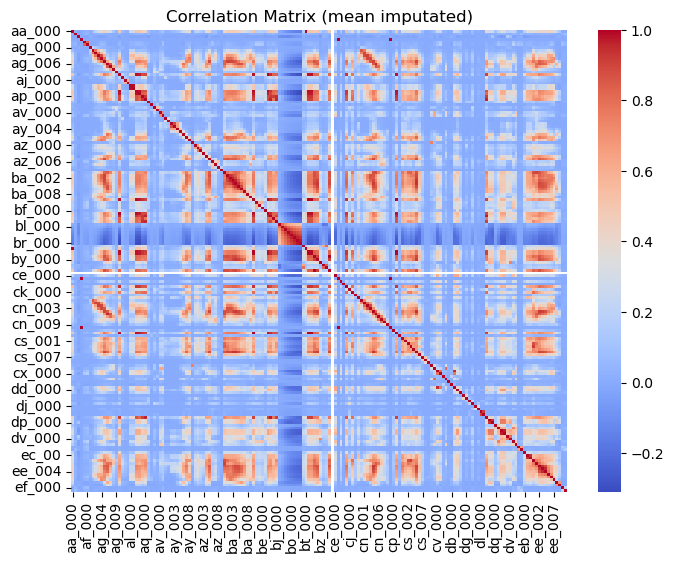

In [17]:
# Calculate the correlation matrix
correlation_matrix_meanimp = X_full_meanimp.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_meanimp, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (mean imputated)")
plt.show()

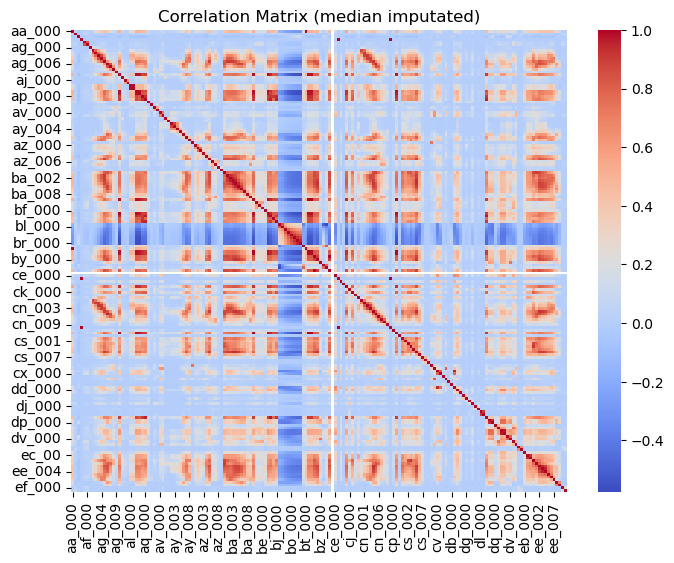

In [18]:
# Calculate the correlation matrix
correlation_matrix_medianimp = X_full_medianimp.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_medianimp, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (median imputated)")
plt.show()

#### (iv) Make scatter plots and box plots

In [19]:
# use mean imputated data here to draw the plots
n = math.floor(math.sqrt(170))
highest_n_cv_meanimp = coefficient_variation_meanimp.sort_values(ascending=False)[0:n]

y_full = pd.concat([y_train, y_test], axis= 0)
all_data = pd.concat([y_full, X_full_meanimp], axis=1)

cv_feature_names = ["class"] + list(highest_n_cv_meanimp.index)

all_data_cvs = all_data[cv_feature_names]
all_data_cvs

cf_000    207.335930
co_000    206.941549
ad_000    206.786809
cs_009    192.498194
dj_000    122.169994
as_000    113.895899
dh_000    112.666588
df_000    111.279258
ag_000     91.465520
au_000     86.090347
ak_000     78.624114
az_009     78.005605
ay_009     77.461293
dtype: float64

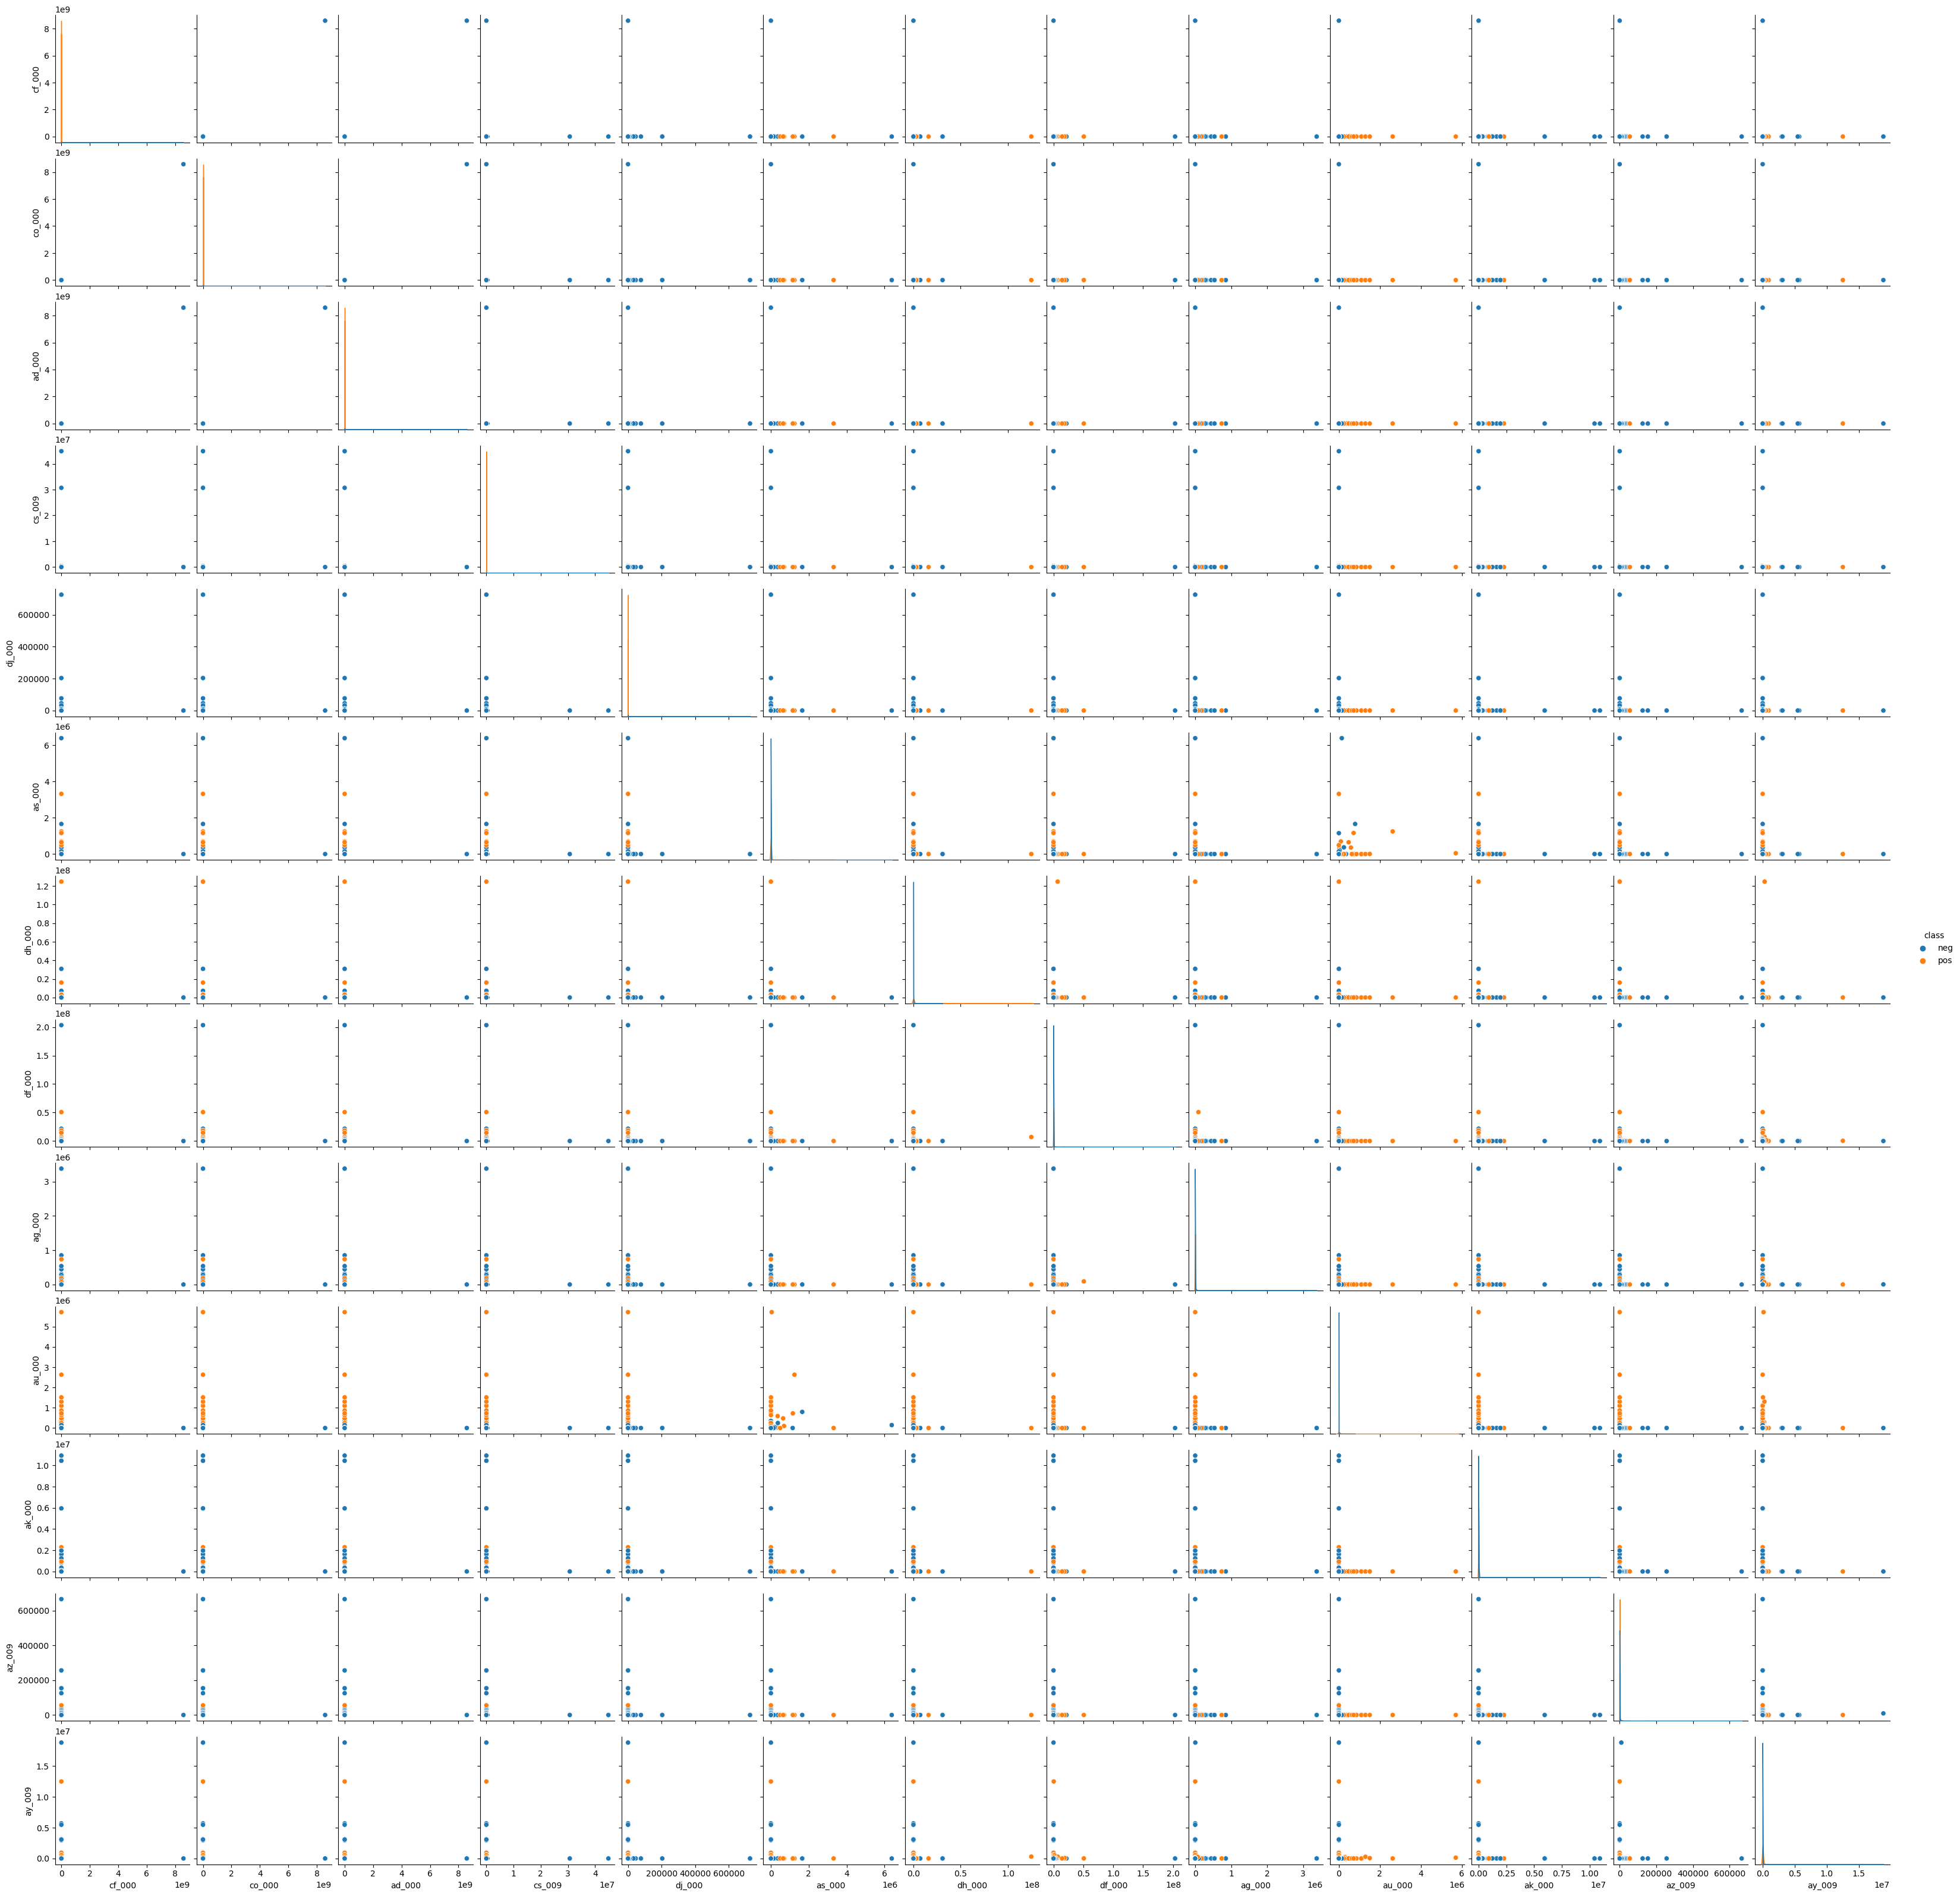

In [39]:
sns.pairplot(all_data_cvs, hue="class")

In [62]:
all_data_cvs.dtypes

class      object
cf_000    float64
co_000    float64
ad_000    float64
cs_009    float64
dj_000    float64
as_000    float64
dh_000    float64
df_000    float64
ag_000    float64
au_000    float64
ak_000    float64
az_009    float64
ay_009    float64
dtype: object

In [63]:
numeric_cols

Index(['cf_000', 'co_000', 'ad_000', 'cs_009', 'dj_000', 'as_000', 'dh_000',
       'df_000', 'ag_000', 'au_000', 'ak_000', 'az_009', 'ay_009'],
      dtype='object')

In [45]:
# Scatter plots for these 13 features takes long time, and features have different scales, let's do standardization here to unify the scales
# Extract numeric columns
numeric_cols = all_data_cvs.select_dtypes(include=['number']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the numeric columns in new data frame
all_data_cvs_scaled = all_data_cvs
all_data_cvs_scaled[numeric_cols] = scaler.fit_transform(all_data_cvs[numeric_cols])


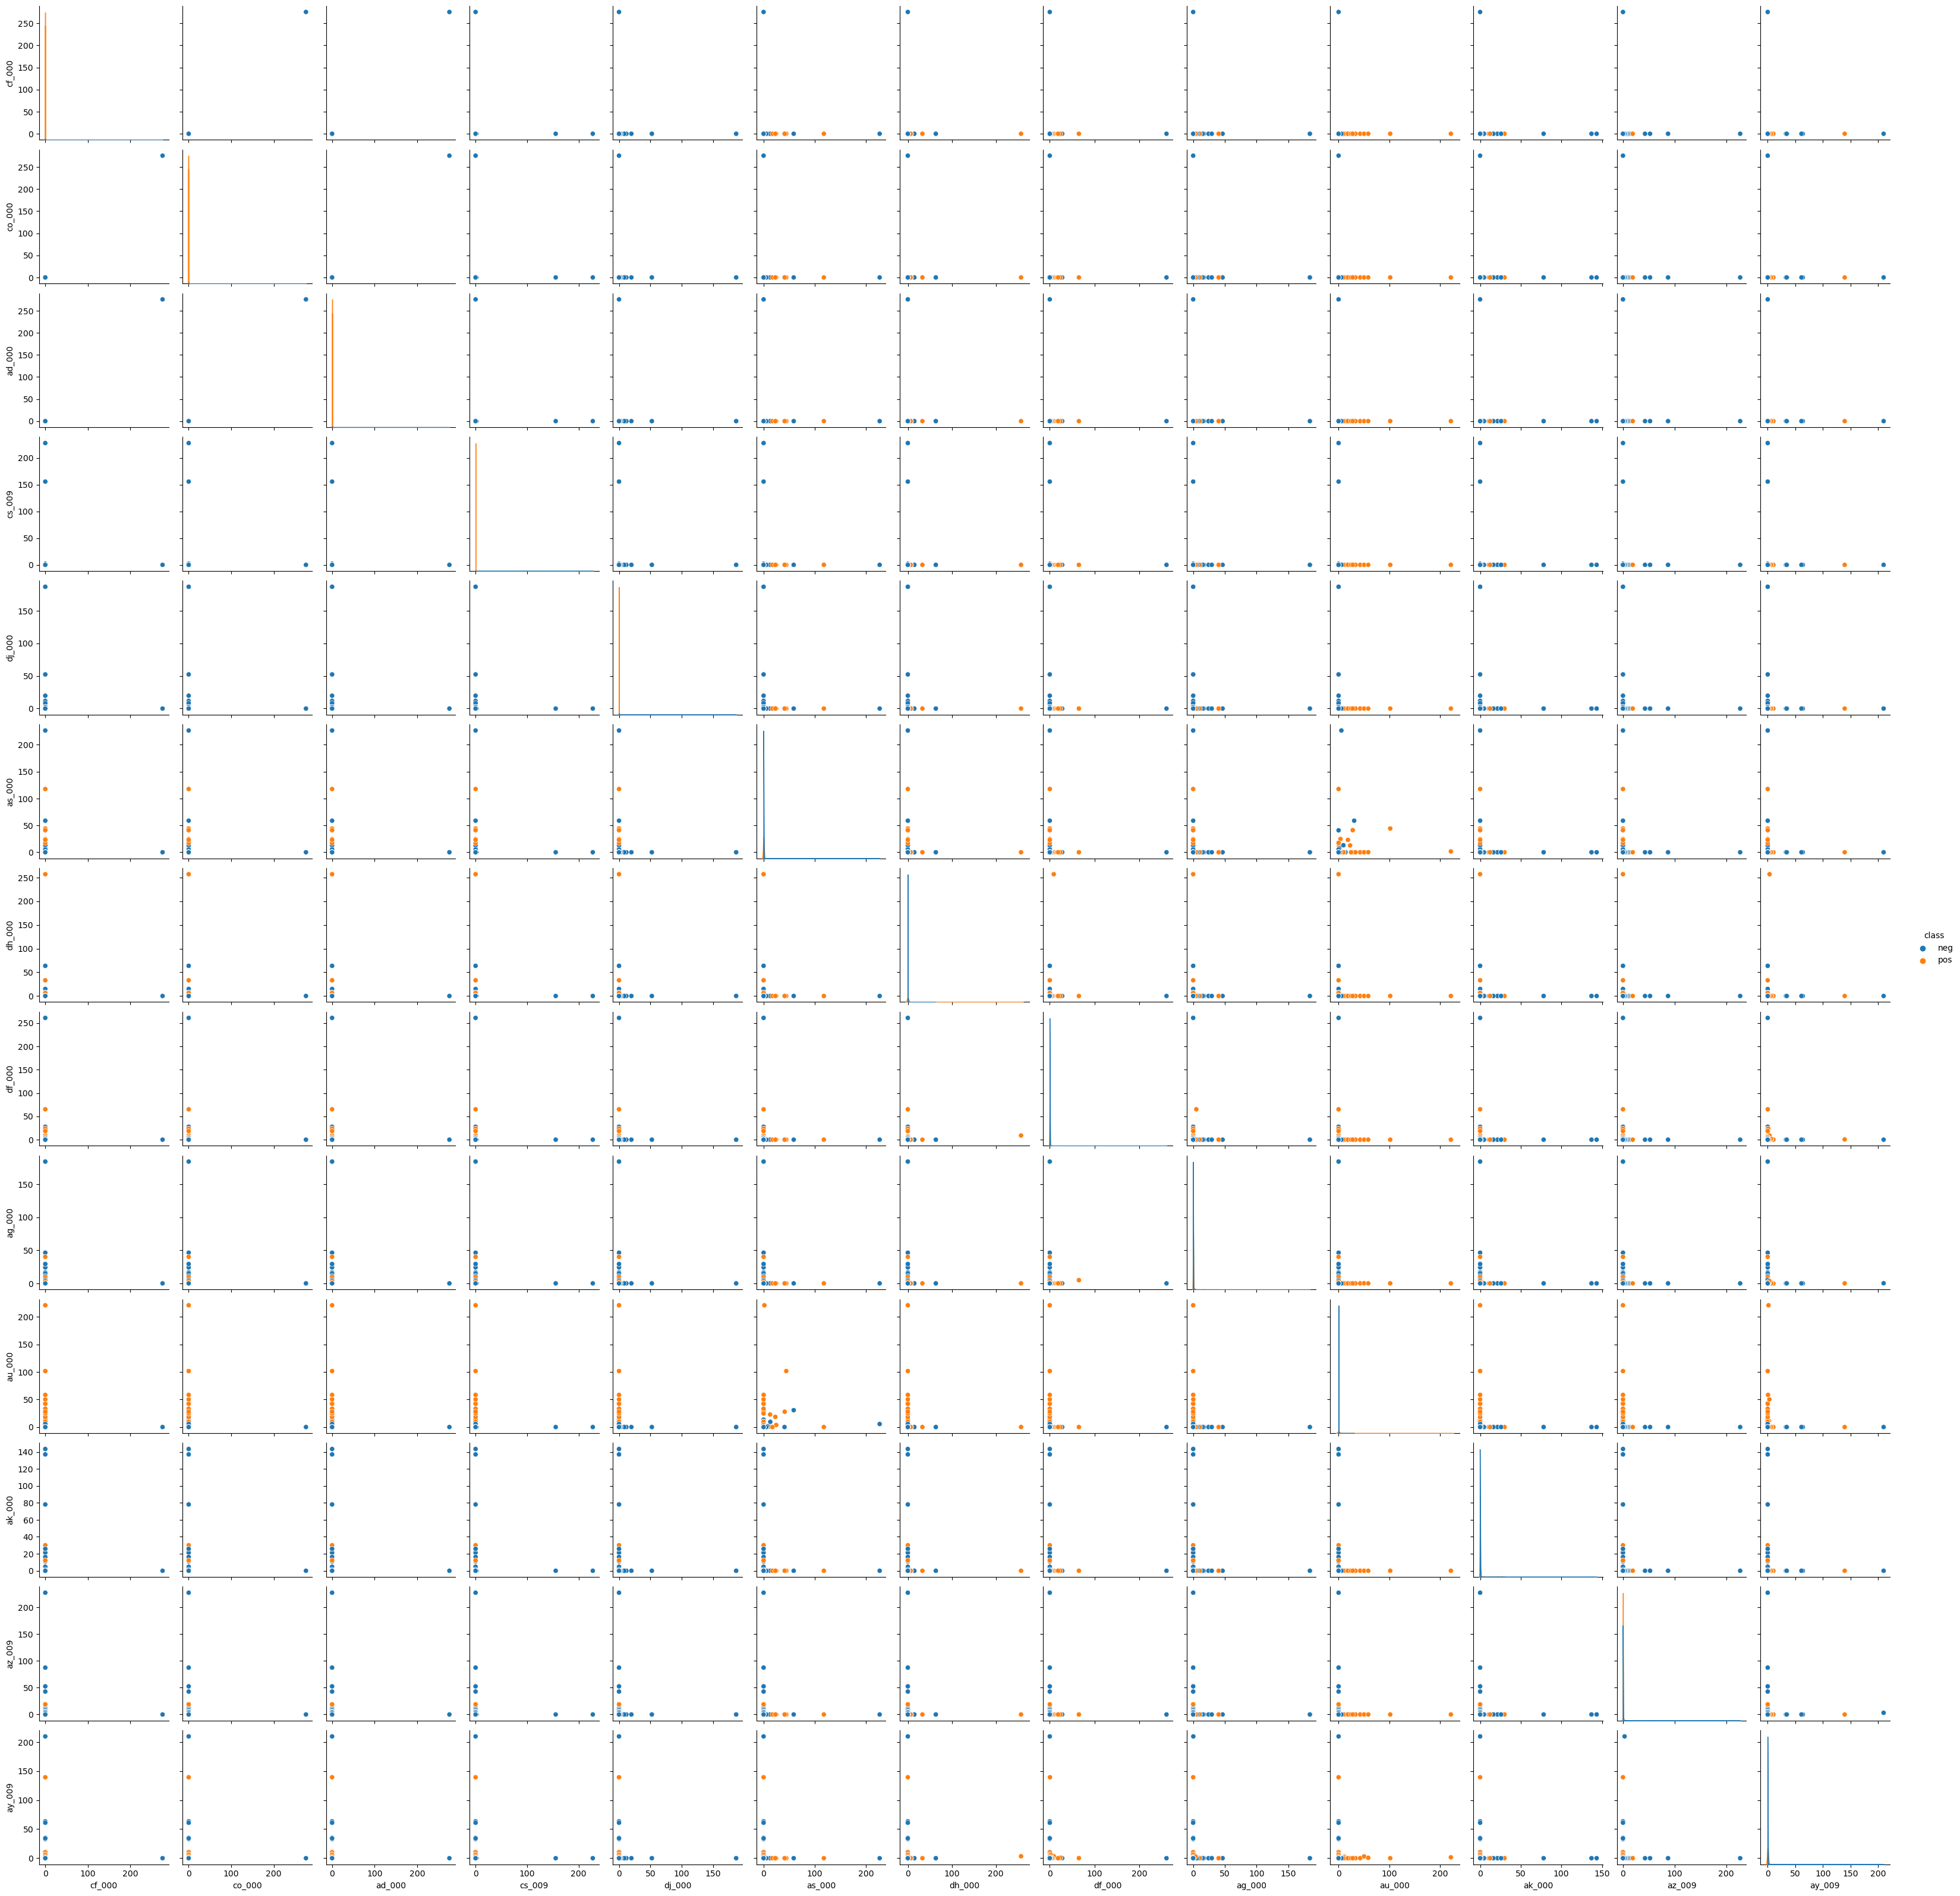

In [47]:
# Draw the scatter plots with scaled data
sns.pairplot(all_data_cvs_scaled, hue = "class")

In [70]:
# Also try min-max scaler to unify the scales
# Create a StandardScaler object
mm_scaler = MinMaxScaler()

# Standardize the numeric columns in new data frame
all_data_cvs_mmscaled = all_data_cvs
all_data_cvs_mmscaled[numeric_cols] = mm_scaler.fit_transform(all_data_cvs[numeric_cols])

In [71]:
all_data_cvs[numeric_cols]

cf_000        co_000        ad_000  cs_009  dj_000  as_000  \
0      2.329835e-10  2.562819e-08  3.261769e-08     0.0     0.0     0.0   
1      2.215927e-05  2.219349e-05  2.220573e-05     0.0     0.0     0.0   
2      0.000000e+00  0.000000e+00  1.164918e-08     0.0     0.0     0.0   
3      2.329835e-10  2.329835e-10  7.688457e-09     0.0     0.0     0.0   
4      0.000000e+00  2.353134e-08  5.335323e-08     0.0     0.0     0.0   
...             ...           ...           ...     ...     ...     ...   
15995  2.329835e-10  4.892654e-09  1.039107e-07     0.0     0.0     0.0   
15996  2.329835e-10  0.000000e+00  5.358621e-09     0.0     0.0     0.0   
15997  2.329835e-10  4.403389e-08  1.768345e-07     0.0     0.0     0.0   
15998  0.000000e+00  0.000000e+00  3.727736e-09     0.0     0.0     0.0   
15999  0.000000e+00  0.000000e+00  4.659671e-10     0.0     0.0     0.0   

       dh_000  df_000  ag_000  au_000  ak_000  az_009  ay_009  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...     ...     ...     ...  
15995     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
15996     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
15997     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
15998     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
15999     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[76000 rows x 13 columns]

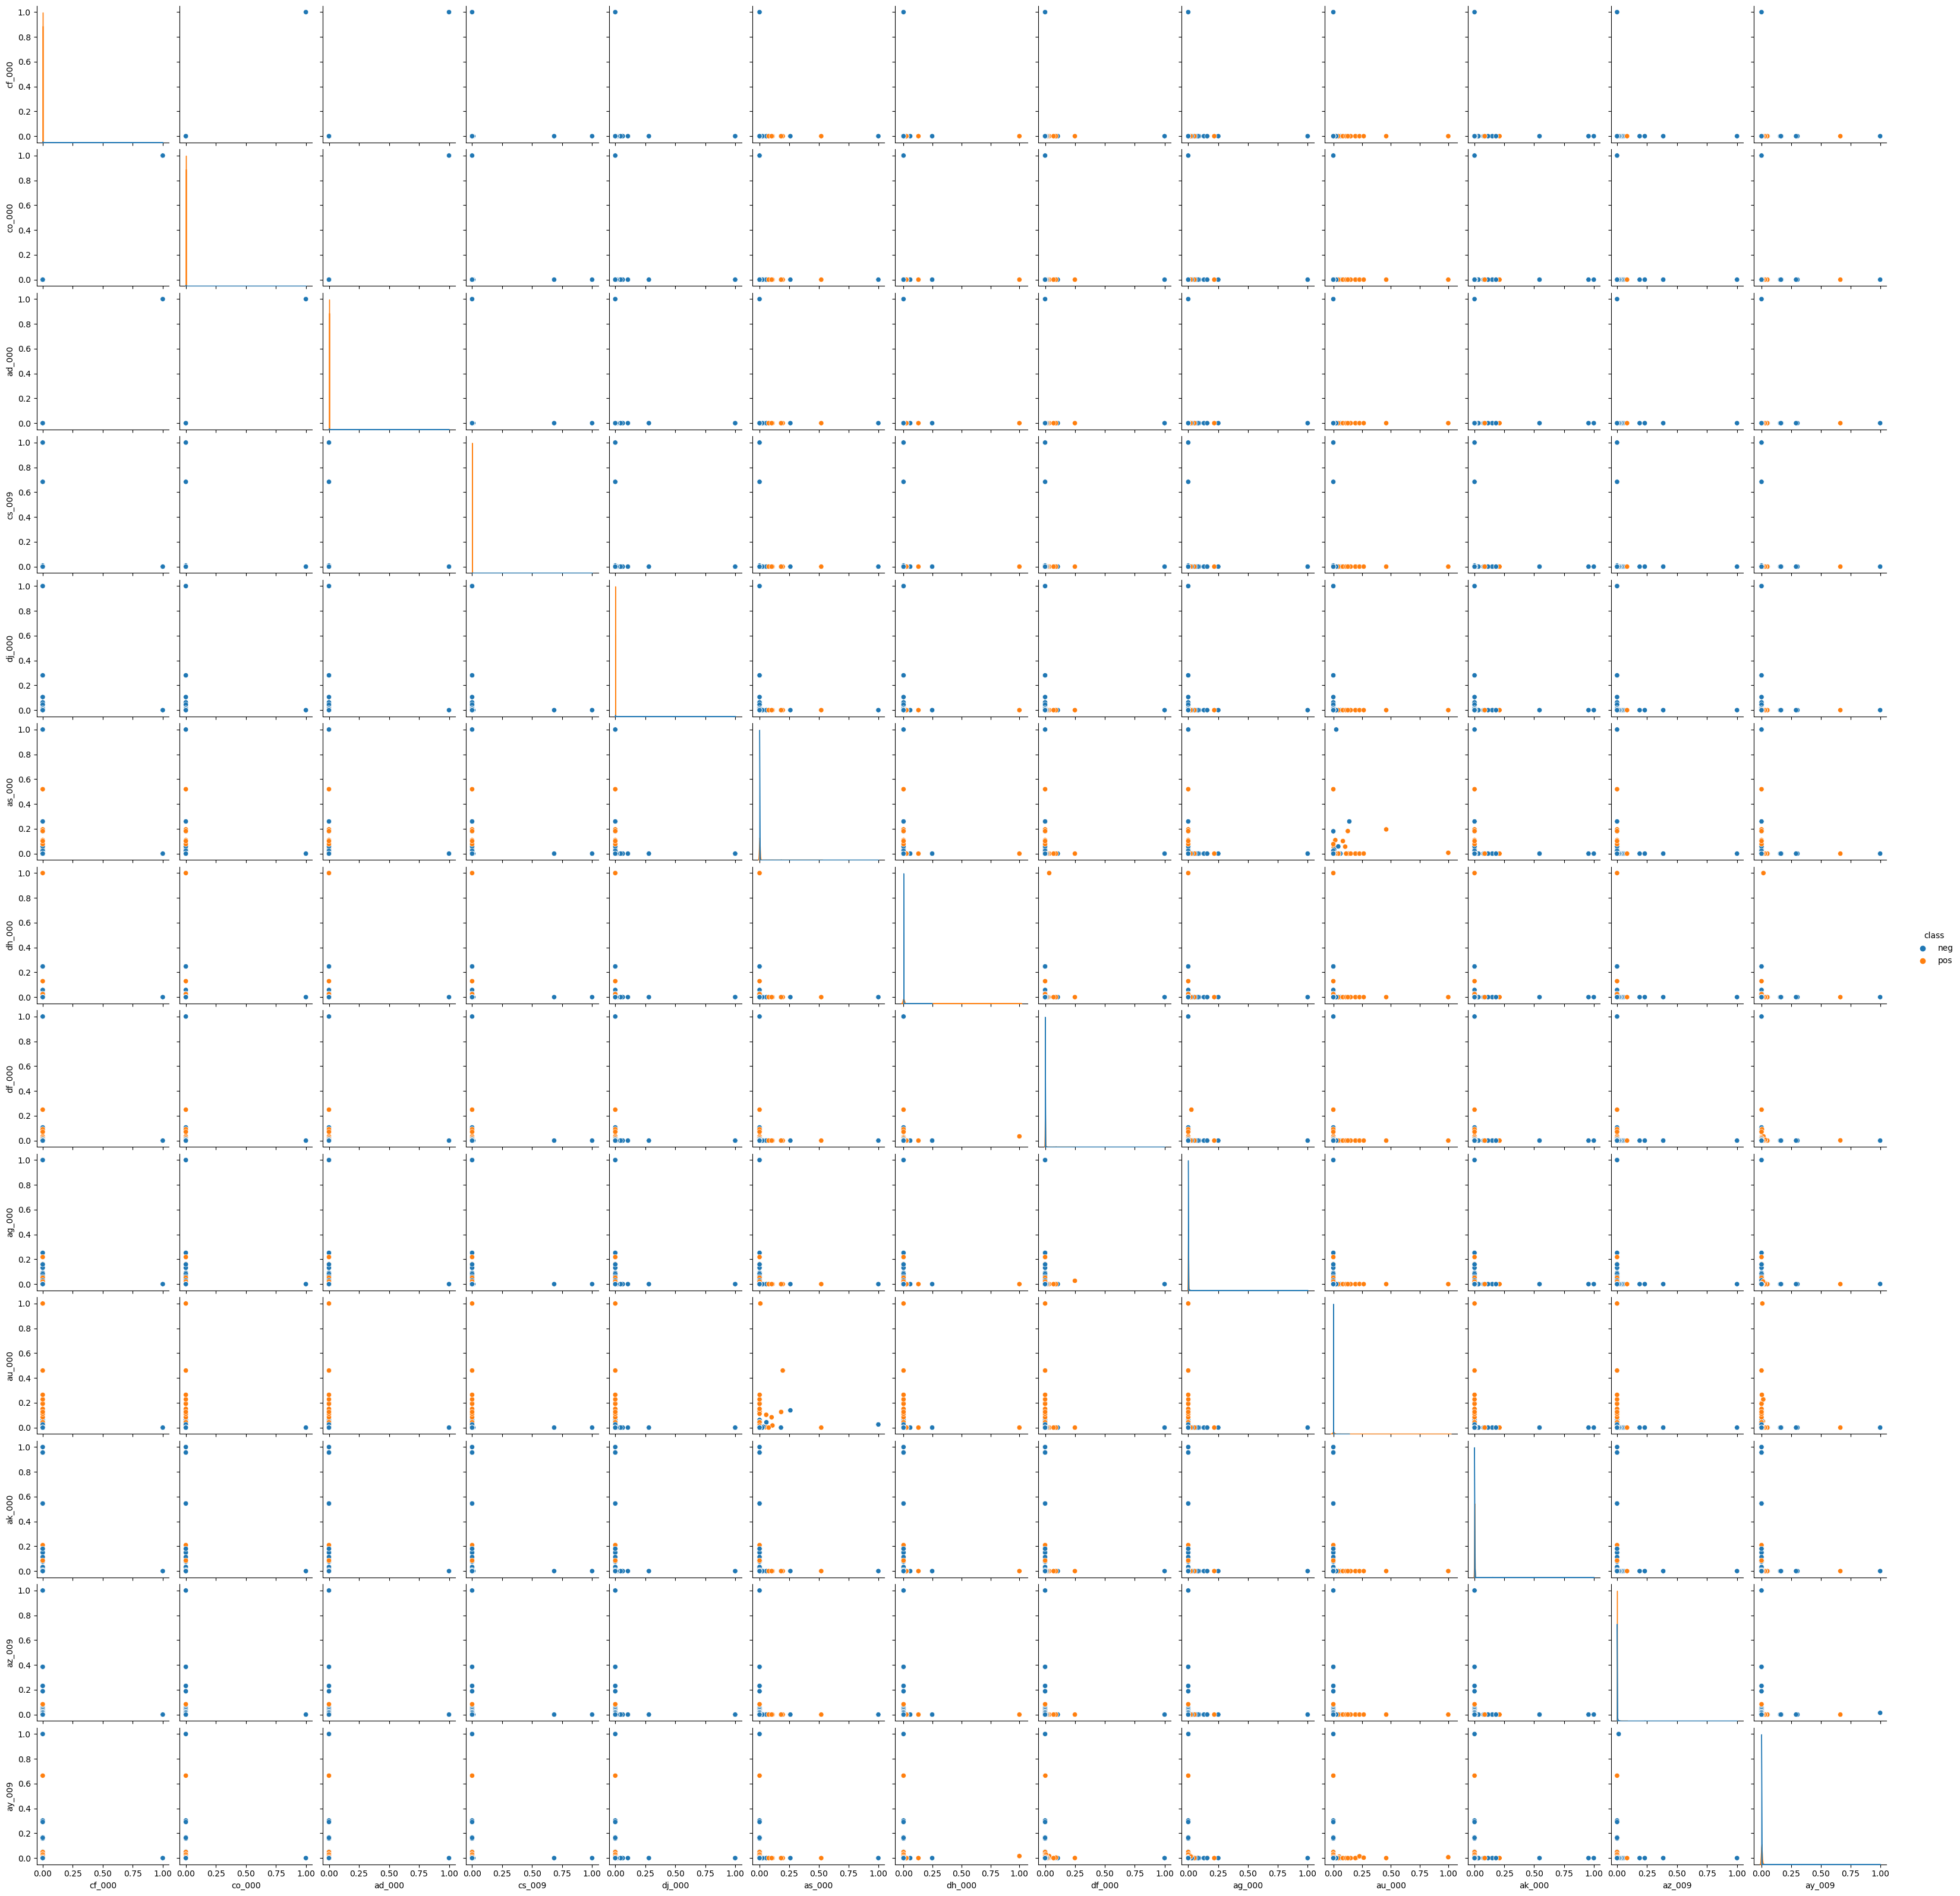

In [72]:
# Draw the pairplot using min-max scaled data
sns.pairplot(all_data_cvs_mmscaled, hue = "class")

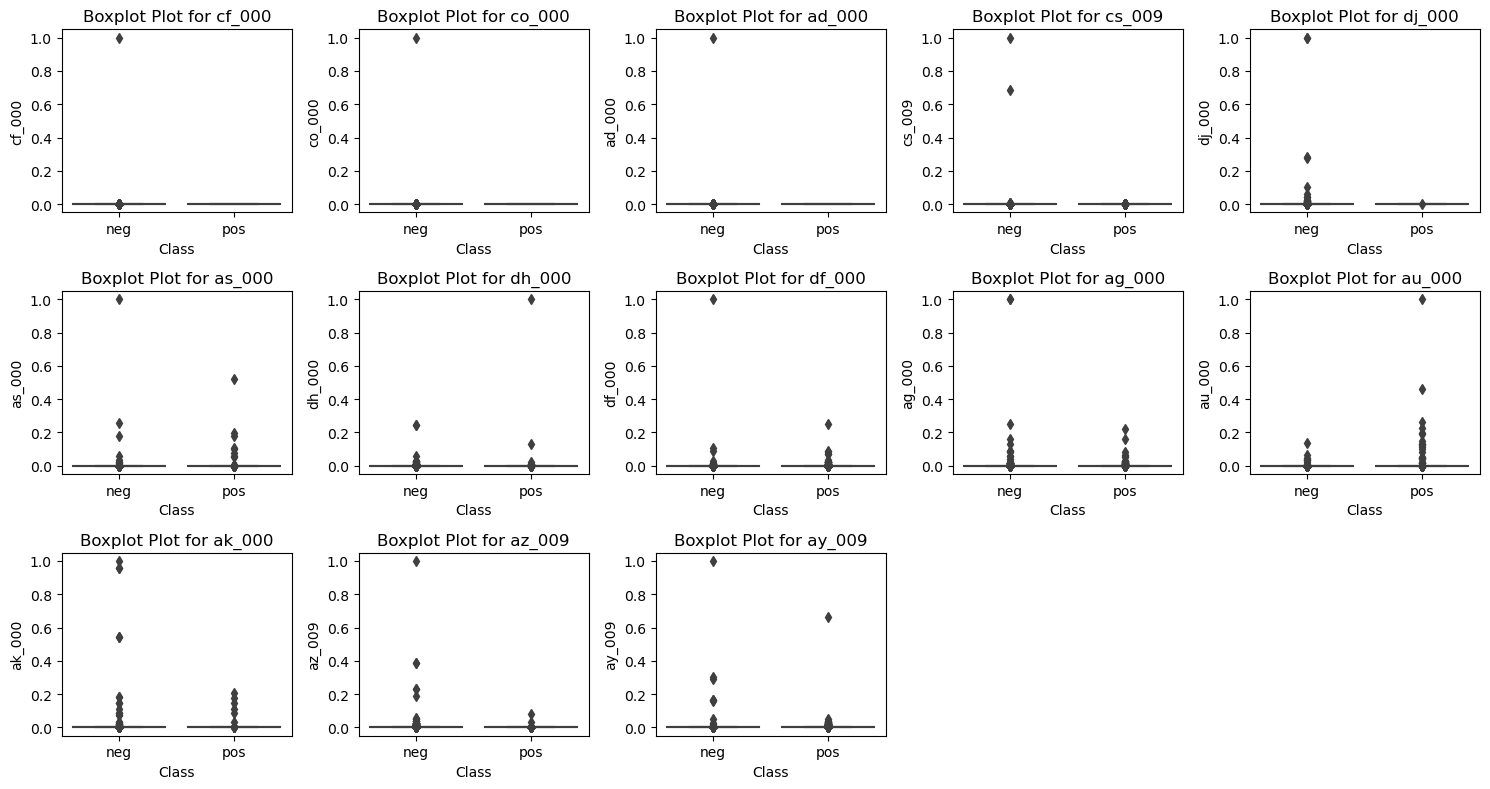

In [92]:
# Draw the box plots for all data
plt.figure(figsize=(15, 8))
for index, feature in enumerate(all_data_cvs.iloc[:, 1:], start=1):
    plt.subplot(3, 5, index)  # 3 rows, 5 columns layout for 13 features
    sns.boxplot(x='class', y=feature, data= all_data_cvs)
    plt.title(f'Boxplot Plot for {feature}')
    plt.ylabel(feature)
    plt.xlabel('Class')
    
plt.tight_layout()
plt.show()

#### (v) Is this data set imbalanced?

In [98]:
num_pos = sum(all_data["class"] == "pos")
num_neg = sum(all_data["class"] == "neg")

print("The number of positive classes:", num_pos)
print("The number of negative classes:", num_neg)

The number of positive classes: 1375
The number of negative classes: 74625


Yes, the data set is imbalanced.

### (c) Train a random forest

In [105]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, oob_score=True)
rf_classifier.fit(X_train_meanimp, y_train)

# Predictions for training set
y_train_pred = rf_classifier.predict(X_train_meanimp)

# Predictions for test set
y_test_pred = rf_classifier.predict(X_test_meanimp)

In [102]:
# Calculate confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [112]:
# Convert string labels to binary values
label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)
y_test_binary = label_encoder.transform(y_test)

# Train a Random Forest classifier
rf_classifier.fit(X_train_meanimp, y_train_binary)

# Predict probabilities for the positive class
y_train_probs = rf_classifier.predict_proba(X_train_meanimp)[:, 1]
y_test_probs = rf_classifier.predict_proba(X_test_meanimp)[:, 1]

# Calculate ROC and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

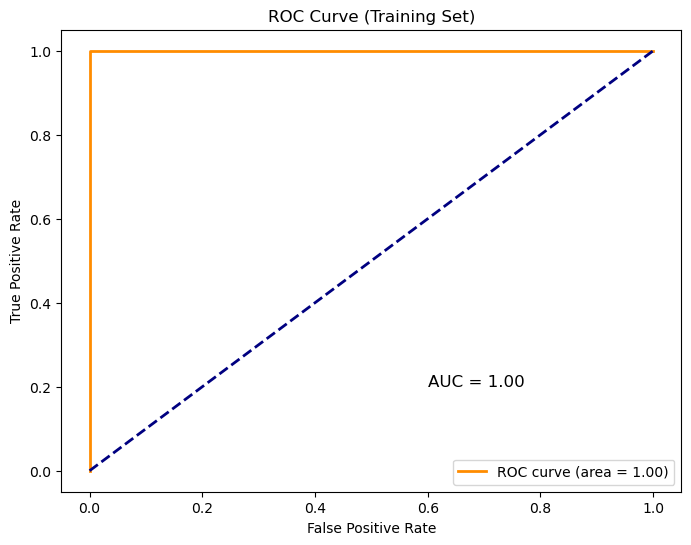

In [118]:
# Plot ROC curve (Training Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_train:.2f}', fontsize=12)

plt.show()

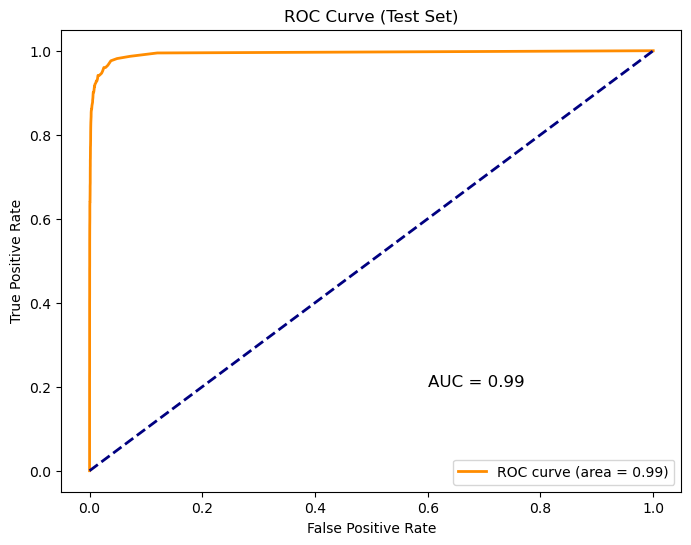

In [119]:
# Plot ROC curve (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_test:.2f}', fontsize=12)

plt.show()

In [116]:
# Calculate misclassification for training set
misclassification_train = 1 - accuracy_score(y_train, y_train_pred)

# Calculate misclassification for test set
misclassification_test = 1 - accuracy_score(y_test, y_test_pred)

# Calculate Out-of-Bag (OOB) error estimate
oob_error = 1 - rf_classifier.oob_score_

In [117]:
# Print the results
print("Confusion Matrix (Training Set):\n", conf_matrix_train)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)
print("ROC AUC (Training Set):", roc_auc_train)
print("ROC AUC (Test Set):", roc_auc_test)
print("Misclassification (Training Set):", misclassification_train)
print("Misclassification (Test Set):", misclassification_test)
print("Out-of-Bag (OOB) Error Estimate:", oob_error)

Confusion Matrix (Training Set):
 [[59000     0]
 [    1   999]]
Confusion Matrix (Test Set):
 [[15605    20]
 [  103   272]]
ROC AUC (Training Set): 1.0
ROC AUC (Test Set): 0.9936794453333334
Misclassification (Training Set): 1.666666666666483e-05
Misclassification (Test Set): 0.007687499999999958
Out-of-Bag (OOB) Error Estimate: 0.00605


### (d) Research class imbalance in random forest

1. Weighted Random Forest: change the weight that each class has when calculating the “impurity” score of a chosen split point, placing a heavier penalty on misclassifying the minority class.

In [120]:
# Train a Random Forest classifier
wrf_classifier = RandomForestClassifier(random_state=42, oob_score=True, class_weight="balanced")
wrf_classifier.fit(X_train_meanimp, y_train)

# Predictions for training set
y_train_pred = wrf_classifier.predict(X_train_meanimp)

# Predictions for test set
y_test_pred = wrf_classifier.predict(X_test_meanimp)

# Calculate confusion matrix for training set
conf_matrix_train_w = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for test set
conf_matrix_test_w = confusion_matrix(y_test, y_test_pred)

In [121]:
# Train a Random Forest classifier (assuming rf_classifier is already defined)
wrf_classifier.fit(X_train_meanimp, y_train_binary)

# Predict probabilities for the positive class
y_train_probs = wrf_classifier.predict_proba(X_train_meanimp)[:, 1]
y_test_probs = wrf_classifier.predict_proba(X_test_meanimp)[:, 1]

# Calculate ROC and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_probs)
roc_auc_train_w = auc(fpr_train, tpr_train)

# Calculate ROC and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_probs)
roc_auc_test_w = auc(fpr_test, tpr_test)

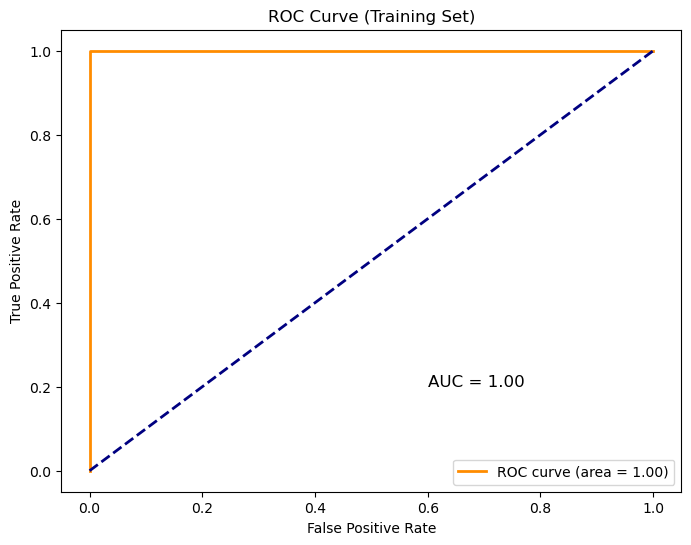

In [126]:
# Plot ROC curve (Training Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_w:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_train_w:.2f}', fontsize=12)

plt.show()

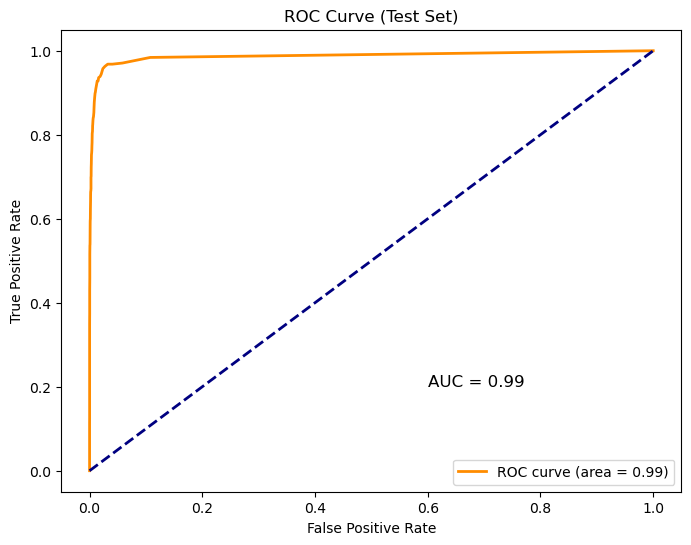

In [127]:
# Plot ROC curve (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_w:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_test_w:.2f}', fontsize=12)

plt.show()

In [128]:
# Calculate misclassification for training set
misclassification_train_w = 1 - accuracy_score(y_train, y_train_pred)

# Calculate misclassification for test set
misclassification_test_w = 1 - accuracy_score(y_test, y_test_pred)

# Calculate Out-of-Bag (OOB) error estimate
oob_error_w = 1 - wrf_classifier.oob_score_

# Print the results
print("Confusion Matrix (Training Set):\n", conf_matrix_train_w)
print("Confusion Matrix (Test Set):\n", conf_matrix_test_w)
print("ROC AUC (Training Set):", roc_auc_train_w)
print("ROC AUC (Test Set):", roc_auc_test_w)
print("Misclassification (Training Set):", misclassification_train_w)
print("Misclassification (Test Set):", misclassification_test_w)
print("Out-of-Bag (OOB) Error Estimate:", oob_error_w)

Confusion Matrix (Training Set):
 [[59000     0]
 [    1   999]]
Confusion Matrix (Test Set):
 [[15612    13]
 [  171   204]]
ROC AUC (Training Set): 1.0
ROC AUC (Test Set): 0.9873226239999999
Misclassification (Training Set): 1.666666666666483e-05
Misclassification (Test Set): 0.011499999999999955
Out-of-Bag (OOB) Error Estimate: 0.007683333333333375


2. Random Forest With Bootstrap Class Weighting: 
- Given that each decision tree is constructed from a bootstrap sample (e.g. random selection with replacement), the class distribution in the data sample will be different for each tree.
- As such, it might be interesting to change the class weighting based on the class distribution in each bootstrap sample, instead of the entire training dataset.

In [129]:
# Train a Random Forest classifier
bwrf_classifier = RandomForestClassifier(random_state=42, oob_score=True, class_weight="balanced_subsample")
bwrf_classifier.fit(X_train_meanimp, y_train)

# Predictions for training set
y_train_pred = bwrf_classifier.predict(X_train_meanimp)

# Predictions for test set
y_test_pred = bwrf_classifier.predict(X_test_meanimp)

In [130]:
# Calculate confusion matrix for training set
conf_matrix_train_bw = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for test set
conf_matrix_test_bw = confusion_matrix(y_test, y_test_pred)

In [131]:
# Train a Random Forest classifier
bwrf_classifier.fit(X_train_meanimp, y_train_binary)

# Predict probabilities for the positive class
y_train_probs = bwrf_classifier.predict_proba(X_train_meanimp)[:, 1]
y_test_probs = bwrf_classifier.predict_proba(X_test_meanimp)[:, 1]

# Calculate ROC and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_probs)
roc_auc_train_bw = auc(fpr_train, tpr_train)

# Calculate ROC and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_probs)
roc_auc_test_bw = auc(fpr_test, tpr_test)

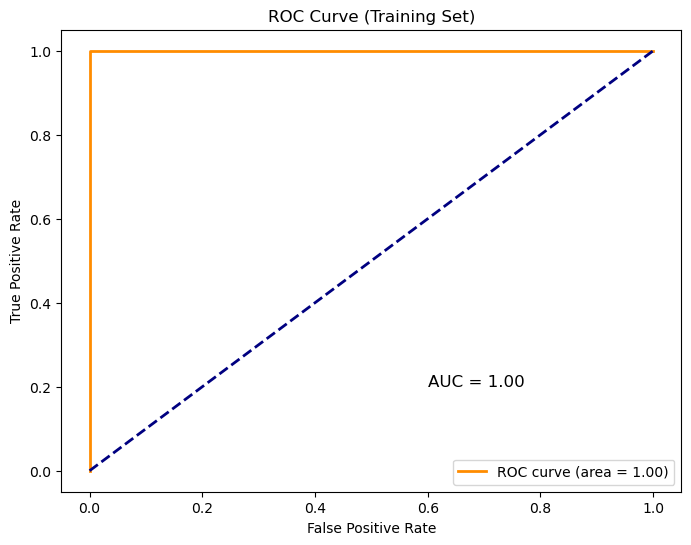

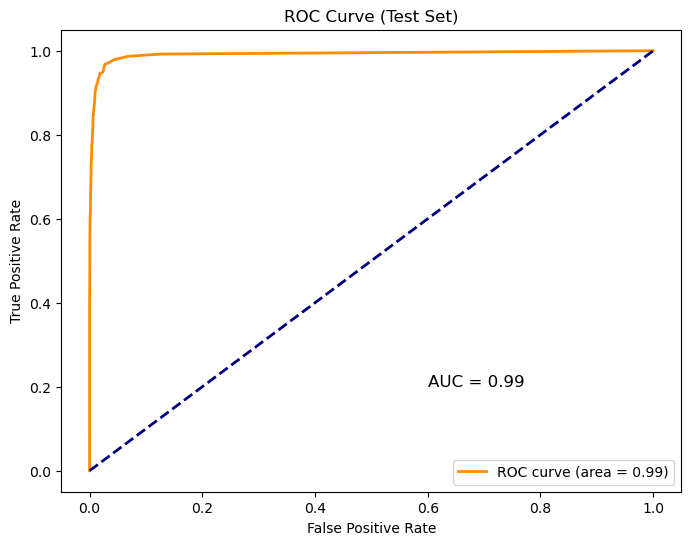

In [132]:
# Plot ROC curve (Training Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_bw:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_train_bw:.2f}', fontsize=12)

plt.show()
# Plot ROC curve (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_bw:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_test_bw:.2f}', fontsize=12)

plt.show()


In [133]:
# Calculate misclassification for training set
misclassification_train_bw = 1 - accuracy_score(y_train, y_train_pred)

# Calculate misclassification for test set
misclassification_test_bw = 1 - accuracy_score(y_test, y_test_pred)

# Calculate Out-of-Bag (OOB) error estimate
oob_error_bw = 1 - bwrf_classifier.oob_score_

# Print the results
print("Confusion Matrix (Training Set):\n", conf_matrix_train_bw)
print("Confusion Matrix (Test Set):\n", conf_matrix_test_bw)
print("ROC AUC (Training Set):", roc_auc_train_bw)
print("ROC AUC (Test Set):", roc_auc_test_bw)
print("Misclassification (Training Set):", misclassification_train_bw)
print("Misclassification (Test Set):", misclassification_test_bw)
print("Out-of-Bag (OOB) Error Estimate:", oob_error_bw)

Confusion Matrix (Training Set):
 [[59000     0]
 [    1   999]]
Confusion Matrix (Test Set):
 [[15615    10]
 [  160   215]]
ROC AUC (Training Set): 1.0
ROC AUC (Test Set): 0.9916143786666667
Misclassification (Training Set): 1.666666666666483e-05
Misclassification (Test Set): 0.010624999999999996
Out-of-Bag (OOB) Error Estimate: 0.0077666666666666995


3. Random Forest With Random Undersampling - Balanced Random Forest
- Another useful modification to random forest is to perform data resampling on the bootstrap sample in order to explicitly change the class distribution.
- The BalancedRandomForestClassifier class from the imbalanced-learn library implements this and performs random undersampling of the majority class in reach bootstrap sample. This is generally referred to as Balanced Random Forest.

In [135]:
# Train a Random Forest classifier
brf_classifier = BalancedRandomForestClassifier(random_state=42, oob_score=True)
brf_classifier.fit(X_train_meanimp, y_train)

# Predictions for training set
y_train_pred = brf_classifier.predict(X_train_meanimp)

# Predictions for test set
y_test_pred = brf_classifier.predict(X_test_meanimp)

In [136]:
# Calculate confusion matrix for training set
conf_matrix_train_b = confusion_matrix(y_train, y_train_pred)

# Calculate confusion matrix for test set
conf_matrix_test_b = confusion_matrix(y_test, y_test_pred)

In [137]:
# Train a Random Forest classifier
brf_classifier.fit(X_train_meanimp, y_train_binary)

# Predict probabilities for the positive class
y_train_probs = brf_classifier.predict_proba(X_train_meanimp)[:, 1]
y_test_probs = brf_classifier.predict_proba(X_test_meanimp)[:, 1]

# Calculate ROC and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_probs)
roc_auc_train_b = auc(fpr_train, tpr_train)

# Calculate ROC and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_probs)
roc_auc_test_b = auc(fpr_test, tpr_test)

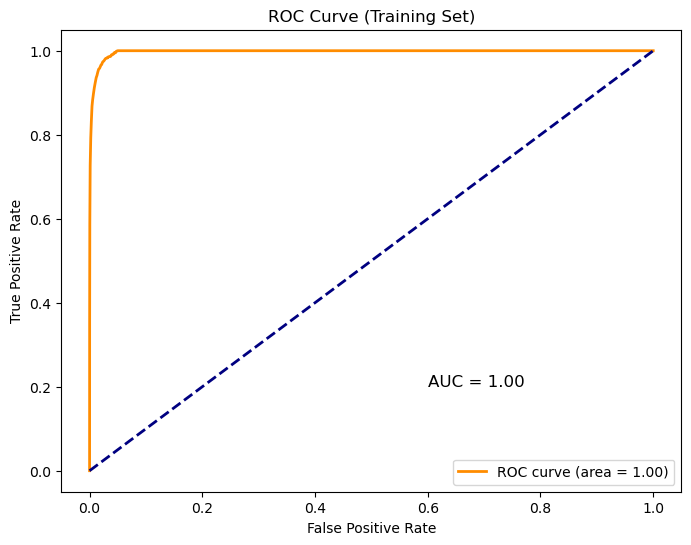

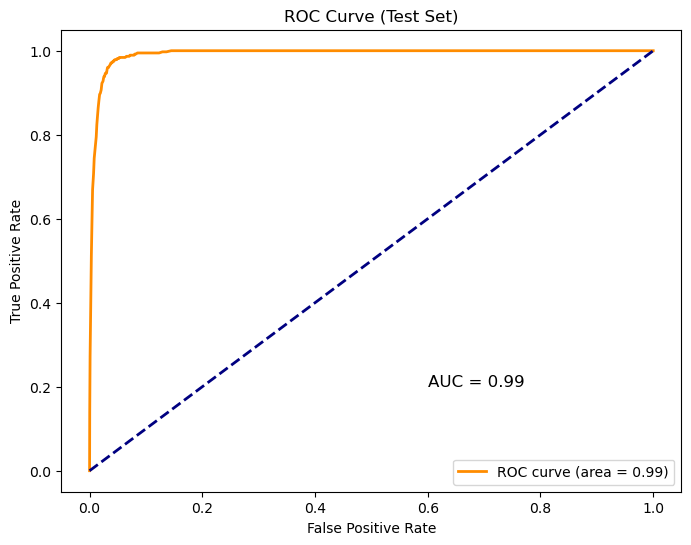

In [138]:
# Plot ROC curve (Training Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_b:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_train_b:.2f}', fontsize=12)

plt.show()
# Plot ROC curve (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_b:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_test_b:.2f}', fontsize=12)

plt.show()

In [139]:
# Calculate misclassification for training set
misclassification_train_b = 1 - accuracy_score(y_train, y_train_pred)

# Calculate misclassification for test set
misclassification_test_b = 1 - accuracy_score(y_test, y_test_pred)

# Calculate Out-of-Bag (OOB) error estimate
oob_error_b = 1 - bwrf_classifier.oob_score_

# Print the results
print("Confusion Matrix (Training Set):\n", conf_matrix_train_b)
print("Confusion Matrix (Test Set):\n", conf_matrix_test_b)
print("ROC AUC (Training Set):", roc_auc_train_b)
print("ROC AUC (Test Set):", roc_auc_test_b)
print("Misclassification (Training Set):", misclassification_train_b)
print("Misclassification (Test Set):", misclassification_test_b)
print("Out-of-Bag (OOB) Error Estimate:", oob_error_b)

Confusion Matrix (Training Set):
 [[55869  3131]
 [    0  1000]]
Confusion Matrix (Test Set):
 [[14816   809]
 [    7   368]]
ROC AUC (Training Set): 0.997386
ROC AUC (Test Set): 0.9922308266666667
Misclassification (Training Set): 0.05218333333333336
Misclassification (Test Set): 0.051000000000000045
Out-of-Bag (OOB) Error Estimate: 0.0077666666666666995


### (e) XGBoost and Model Trees

In [144]:
# Define logistic regression as the base learner
logreg = LogisticRegressionCV(penalty='l1', solver='liblinear')

# Define XGBoost model with logistic regression as base learner
model = xgb.XGBClassifier(base_estimator=logreg)

# Train the model with your data
model.fit(X_train_meanimp, y_train_binary)

[17:26:44] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.



XGBClassifier(base_estimator=LogisticRegressionCV(penalty='l1',
                                                  solver='liblinear'),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [147]:
# Use cross-validation to find the optimal regularization term alpha
alphas = [0.01, 0.1, 1, 10]  # You can adjust the list of alphas based on your requirements
cv_scores = []
for alpha in alphas:
    logreg.C = alpha
    scores = cross_val_score(model, X_train_meanimp, y_train_binary, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

optimal_alpha = alphas[cv_scores.index(max(cv_scores))]

[17:32:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[17:32:22] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[17:32:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[17:33:14] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[17:33:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[17:34:01] WARNING: /var/folders/nz/j6p8

In [149]:
# Train the model tree with the optimal alpha
logreg.C = optimal_alpha
model.fit(X_train_meanimp, y_train_binary)

[17:45:07] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.



XGBClassifier(base_estimator=LogisticRegressionCV(penalty='l1',
                                                  solver='liblinear'),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [166]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train_meanimp)
y_test_pred = model.predict(X_test_meanimp)

# Calculate accuracy and other metrics
train_accuracy_xb = accuracy_score(y_train_binary, y_train_pred)
test_accuracy_xb = accuracy_score(y_test_binary, y_test_pred)

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_pred, pos_label=1)
roc_auc_train_xb = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_pred)
roc_auc_test_xb = auc(fpr_test, tpr_test)

# Confusion Matrix for training and test sets
confusion_train_xb = confusion_matrix(y_train_binary, y_train_pred)
confusion_test_xb = confusion_matrix(y_test_binary, y_test_pred)

# Print or use the metrics as needed
print("Optimal Alpha:", optimal_alpha)
print("Confusion Matrix (Training Set):\n", confusion_train_xb)
print("Confusion Matrix (Test Set):\n", confusion_test_xb)
print("Train Accuracy:", train_accuracy_xb)
print("Test Accuracy:", test_accuracy_xb)
print("ROC AUC (Training Set):", roc_auc_train_xb)
print("ROC AUC (Test Set):", roc_auc_test_xb)


Optimal Alpha: 0.01
Confusion Matrix (Training Set):
 [[59000     0]
 [    1   999]]
Confusion Matrix (Test Set):
 [[15607    18]
 [   78   297]]
Train Accuracy: 0.9999833333333333
Test Accuracy: 0.994
ROC AUC (Training Set): 0.9995
ROC AUC (Test Set): 0.895424


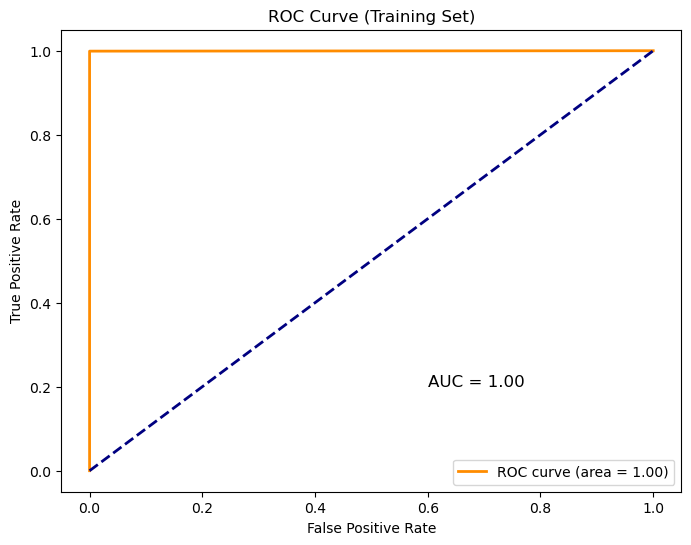

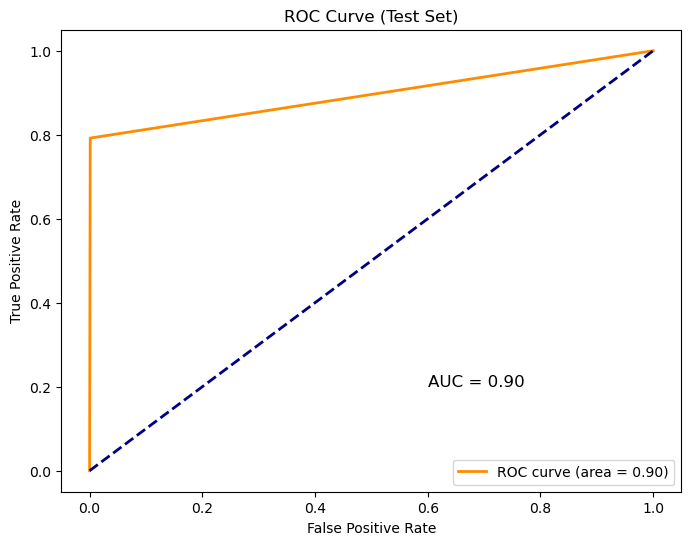

In [167]:
# Plot ROC curve (Training Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_xb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_train_xb:.2f}', fontsize=12)

plt.show()
# Plot ROC curve (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_xb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_test_xb:.2f}', fontsize=12)

plt.show()

### (f) Use SMOTE to pre-process your data

In [177]:
all_data

class   aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       neg  76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       neg  33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       neg  41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3       neg     12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       neg  60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...     ...      ...       ...           ...            ...     ...     ...   
15995   neg  81852.0  0.772065  2.130706e+09     892.000000     0.0     0.0   
15996   neg     18.0  0.000000  5.200000e+01      46.000000     8.0    26.0   
15997   neg  79636.0  0.772065  1.670000e+03    1518.000000     0.0     0.0   
15998   neg    110.0  0.772065  3.600000e+01      32.000000     0.0     0.0   
15999   neg      8.0  0.000000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
15995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
15996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
15997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
15998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
15999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
15995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
15996       2.0       0.0       0.0      0.0     0.0     0.0  
15997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
15998    1004.0    1338.0      74.0      0.0     0.0     0.0  
15999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

In [181]:
training_set_meanimp = pd.concat([y_train, X_train_meanimp], axis=1)
training_set_meanimp

class    aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       neg   76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       neg   33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       neg   41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3       neg      12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       neg   60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...     ...       ...       ...           ...            ...     ...     ...   
59995   neg  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996   neg    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997   neg     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   neg   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   neg   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [186]:
### Downsample
# Separate majority and minority classes
majority_class = training_set_meanimp[training_set_meanimp['class'] == 'neg']
minority_class = training_set_meanimp[training_set_meanimp['class'] == 'pos']

# Downsample majority class to 6,000 samples
majority_downsampled = resample(majority_class, replace=False, n_samples=6000, random_state=42)

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([majority_downsampled, minority_class])

# Shuffle the downsampled data
downsampled_data = downsampled_data.sample(frac=1, random_state=42)
downsampled_data

class    aa_000    ab_000        ac_000         ad_000    ae_000  \
27427   pos  729998.0  0.713189  3.560143e+08  190620.639314   6.81913   
20745   neg      12.0  2.000000  4.200000e+01      34.000000   0.00000   
54097   neg  100118.0  0.713189  2.130706e+09       0.000000   0.00000   
40134   neg  397346.0  0.713189  0.000000e+00  190620.639314   0.00000   
54528   neg   29008.0  0.713189  1.052000e+03    1002.000000   0.00000   
...     ...       ...       ...           ...            ...       ...   
43076   neg    3442.0  0.713189  2.130706e+09  190620.639314   0.00000   
53876   neg    2200.0  0.000000  3.000000e+01      20.000000  18.00000   
13793   neg   40742.0  0.713189  0.000000e+00  190620.639314   0.00000   
56829   neg      14.0  0.713189  2.000000e+00       2.000000   0.00000   
7743    neg  185266.0  0.713189  0.000000e+00  190620.639314   0.00000   

          af_000  ag_000  ag_001   ag_002  ...     ee_002     ee_003  \
27427  11.006817     0.0     0.0  18786.0  ...  4409206.0  1947226.0   
20745   0.000000     0.0     0.0      0.0  ...      254.0       50.0   
54097   0.000000     0.0     0.0      0.0  ...   599434.0   234744.0   
40134   0.000000     0.0     0.0      0.0  ...  7405018.0  2713358.0   
54528   0.000000     0.0     0.0      0.0  ...   329276.0   224742.0   
...          ...     ...     ...      ...  ...        ...        ...   
43076   0.000000     0.0     0.0      0.0  ...    18804.0     7920.0   
53876  18.000000     0.0     0.0      0.0  ...     3512.0     2370.0   
13793   0.000000     0.0     0.0      0.0  ...   276416.0   156708.0   
56829   0.000000     0.0     0.0      0.0  ...       60.0       12.0   
7743    0.000000     0.0     0.0      0.0  ...  1461136.0   710638.0   

          ee_004     ee_005     ee_006      ee_007     ee_008    ee_009  \
27427  2820422.0  3149718.0  5279894.0  13063734.0   253066.0     436.0   
20745       82.0       34.0       30.0         0.0        0.0       0.0   
54097   439692.0   430822.0   467030.0    473312.0  1442812.0   50714.0   
40134  5183752.0  1615780.0    65510.0      5268.0    12700.0      36.0   
54528   533484.0   295520.0    30876.0      3756.0      966.0       0.0   
...          ...        ...        ...         ...        ...       ...   
43076    17530.0    28970.0    15986.0     15990.0    39720.0     222.0   
53876     8462.0    15552.0    20084.0     41636.0      240.0       0.0   
13793   380364.0   287626.0   224340.0    149880.0   284292.0   28564.0   
56829       28.0       24.0       56.0        18.0        0.0       0.0   
7743   1569652.0  1379928.0   952584.0    629296.0  1282114.0  179674.0   

         ef_000    eg_000  
27427  0.090579  0.212756  
20745  0.000000  0.000000  
54097  0.000000  0.000000  
40134  0.000000  0.000000  
54528  0.000000  0.000000  
...         ...       ...  
43076  0.000000  0.000000  
53876  0.000000  0.000000  
13793  0.000000  0.000000  
56829  0.000000  0.000000  
7743   0.000000  0.000000  

[7000 rows x 171 columns]

In [187]:
# Separate features and target variable
X_train = downsampled_data.drop(columns=['class'])
y_train = downsampled_data['class']

label_encoder = LabelEncoder()
y_train_binary = label_encoder.fit_transform(y_train)

In [189]:
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)

# Use cross-validation to find the optimal regularization term alpha
alphas = [0.01, 0.1, 1, 10]  # You can adjust the list of alphas based on your requirements
cv_scores = []
for alpha in alphas:
    logreg.C = alpha
    X_train_smote, y_train_binary_smote = smote.fit_resample(X_train, y_train_binary)
    scores = cross_val_score(model, X_train_smote, y_train_binary_smote, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

optimal_alpha_smote = alphas[cv_scores.index(max(cv_scores))]

[18:34:38] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[18:34:42] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[18:34:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[18:34:56] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[18:35:04] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.

[18:35:13] WARNING: /var/folders/nz/j6p8

In [191]:
# Train the model tree with the optimal alpha
logreg.C = optimal_alpha_smote
X_train_smote, y_train_binary_smote = smote.fit_resample(X_train, y_train_binary)
model.fit(X_train_smote, y_train_binary_smote)

[18:38:53] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "base_estimator" } are not used.



XGBClassifier(base_estimator=LogisticRegressionCV(penalty='l1',
                                                  solver='liblinear'),
              base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [193]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test_meanimp)

# Calculate accuracy and other metrics
train_accuracy_smote = accuracy_score(y_train_binary, y_train_pred)
test_accuracy_smote = accuracy_score(y_test_binary, y_test_pred)

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train_binary, y_train_pred, pos_label=1)
roc_auc_train_smote = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test_binary, y_test_pred)
roc_auc_test_smote = auc(fpr_test, tpr_test)

# Confusion Matrix for training and test sets
confusion_train_smote = confusion_matrix(y_train_binary, y_train_pred)
confusion_test_smote = confusion_matrix(y_test_binary, y_test_pred)

# Print or use the metrics as needed
print("Optimal Alpha:", optimal_alpha_smote)
print("Confusion Matrix (Training Set):\n", confusion_train_smote)
print("Confusion Matrix (Test Set):\n", confusion_test_smote)
print("Train Accuracy:", train_accuracy_smote)
print("Test Accuracy:", test_accuracy_smote)
print("ROC AUC (Training Set):", roc_auc_train_smote)
print("ROC AUC (Test Set):", roc_auc_test_smote)

Optimal Alpha: 0.01
Confusion Matrix (Training Set):
 [[6000    0]
 [   0 1000]]
Confusion Matrix (Test Set):
 [[15245   380]
 [   25   350]]
Train Accuracy: 1.0
Test Accuracy: 0.9746875
ROC AUC (Training Set): 1.0
ROC AUC (Test Set): 0.9545066666666666


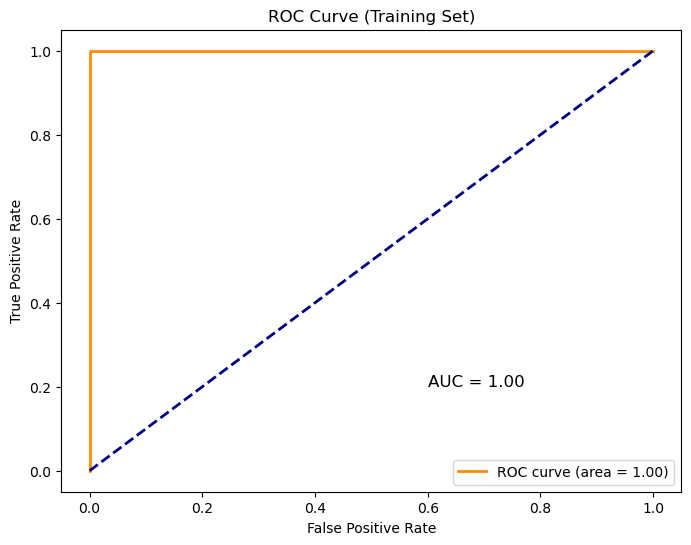

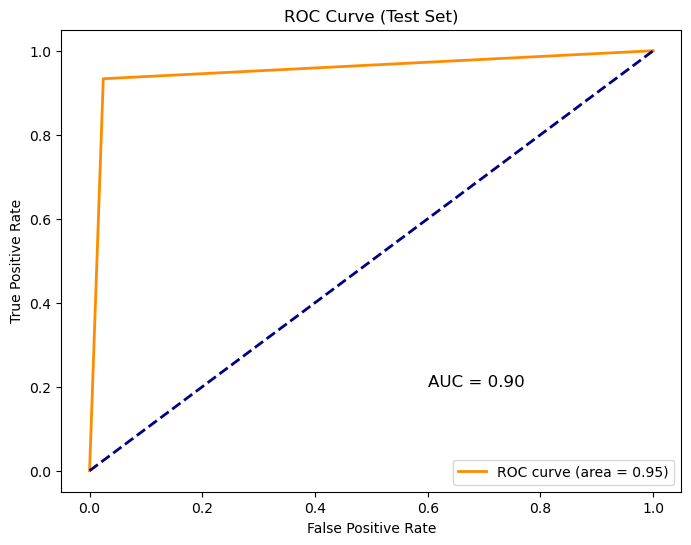

In [194]:
# Plot ROC curve (Training Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_train_xb:.2f}', fontsize=12)

plt.show()
# Plot ROC curve (Test Set)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

# Display AUC value on the plot
plt.text(0.6, 0.2, f'AUC = {roc_auc_test_xb:.2f}', fontsize=12)

plt.show()

## 2. ISLR 6.6.3

(a): iv is true, the constrain will be lossen if $s$ increases from 0, more beta will be included and training error will be decreased. 
<br>
(b): ii is true, will more betas included in the model, the model will be fitting test data better, but test RSS will decrease since it might overfit the training set.
<br>
(c): iii is true, more betas, less bias, higher variance.
<br>
(d): iv is true, less bias with more model flexibility.
<br>
(e): v is true, the model selection will not influence the irreducible error.

## 3. ISLR 6.6.5

(a)
Ridge: minimize $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (\hat\beta_1^2 + \hat\beta_2^2)$

(b) 

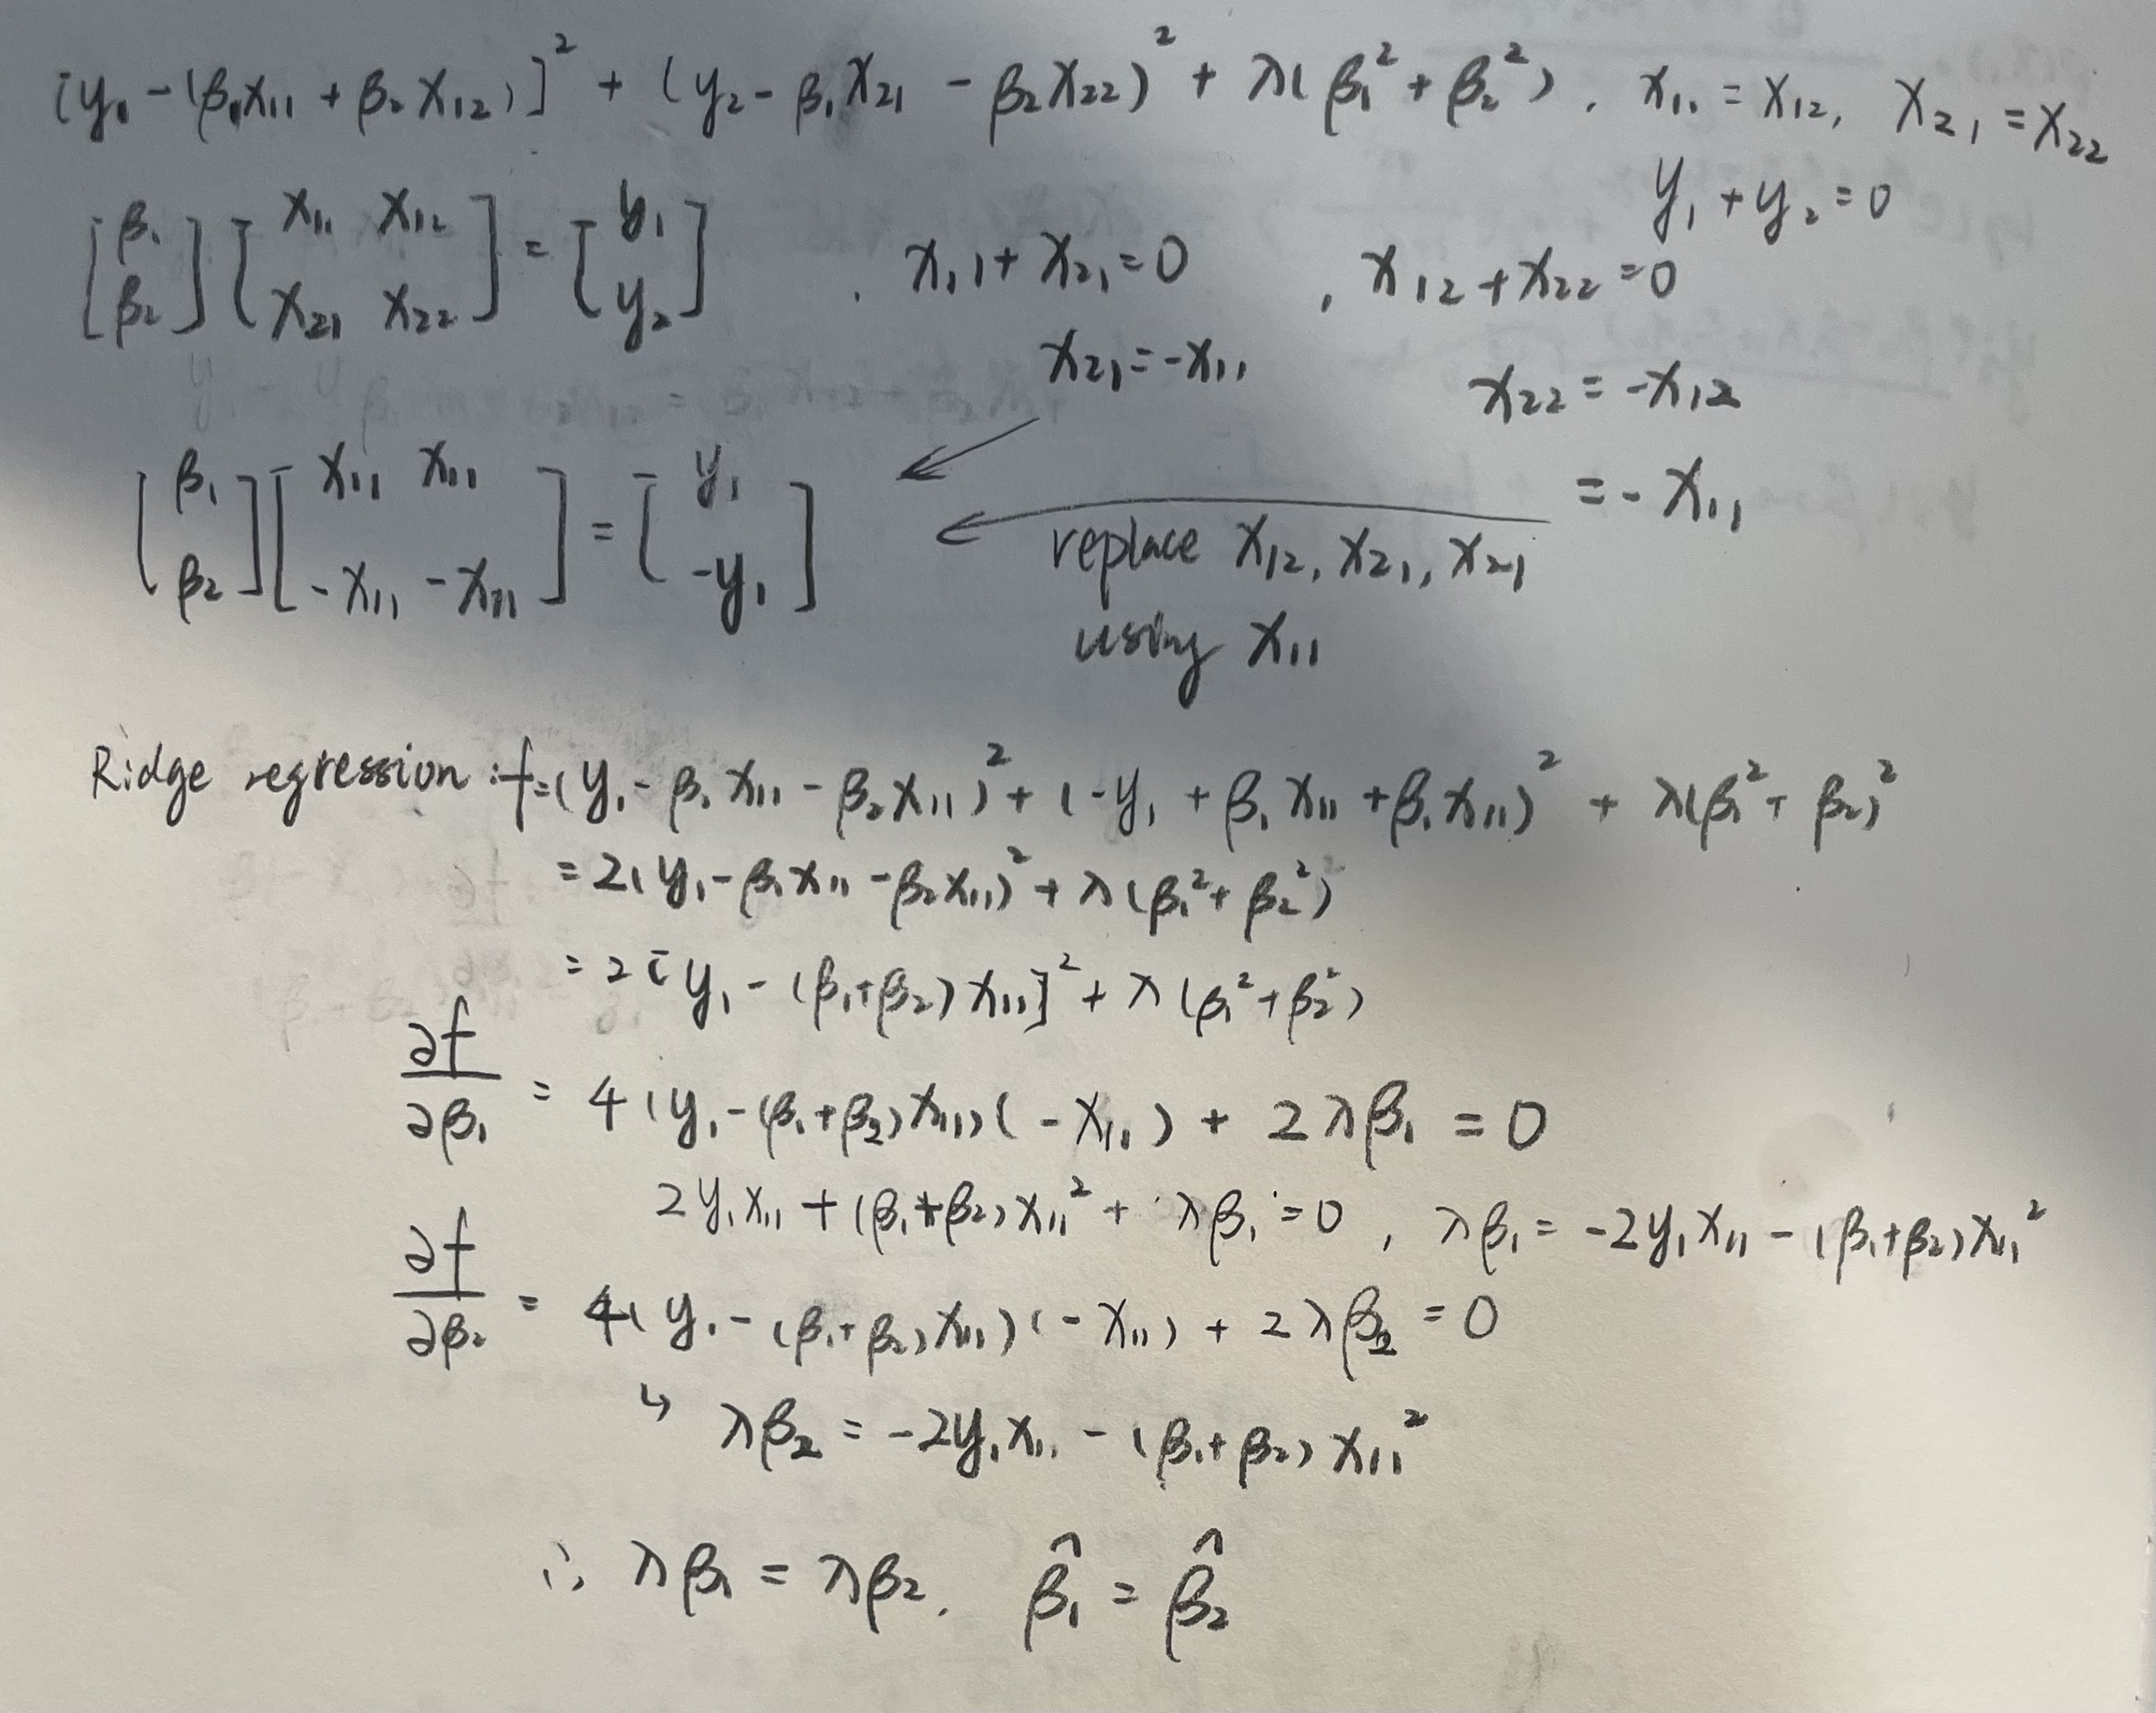

In [260]:
Image("./IMG_0672.jpeg")

(c)
Lasso: minimize $(y_1 - \hat\beta_1x_{11} - \hat\beta_2x_{12})^2 + (y_2 - \hat\beta_1x_{21} - \hat\beta_2x_{22})^2 + \lambda (|\hat\beta_1| + |\hat\beta_2|)$


(d)

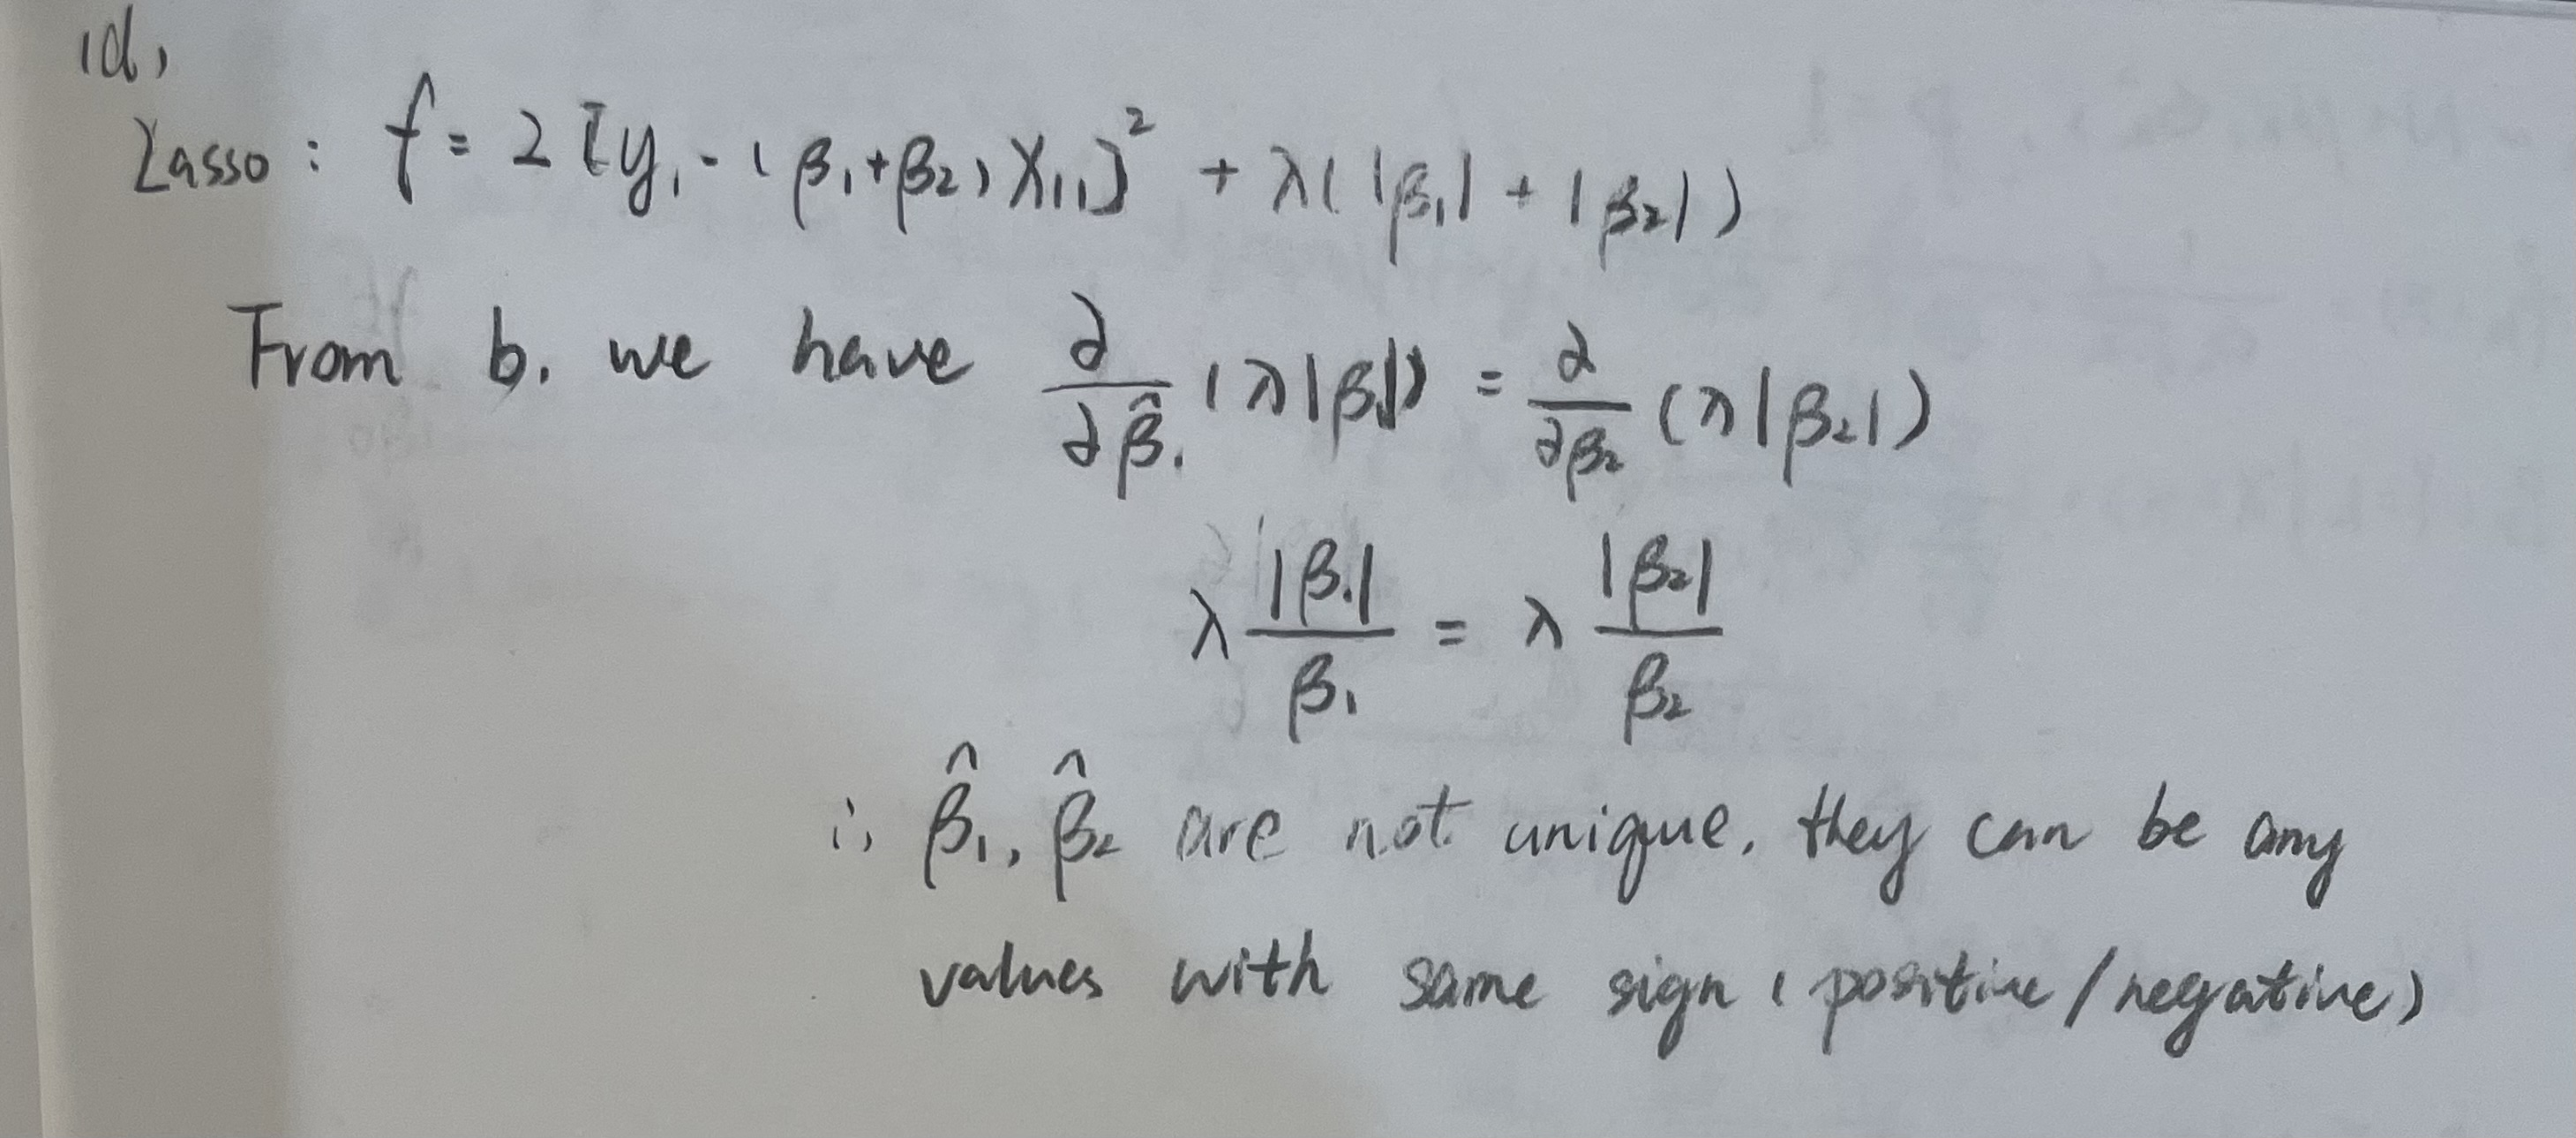

In [261]:
Image("./IMG_0673.jpeg")

## 4. ISLR 8.4.5

Majority vote: red (6 values larger than .5)
<br>
Average probability: green, since the average probability is less than 0.5 $$(0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75)/ 10 = 0.45 < 0.5$$

## 5. ISLR 9.7.3

(a)

In [201]:
data= pd.DataFrame({
    "X1": [3,2,4,1,2,4,4],
    "X2": [4,2,4,4,1,3,1],
    "Y": ['red','red','red','red','blue','blue','blue']
})
data

X1  X2     Y
0   3   4   red
1   2   2   red
2   4   4   red
3   1   4   red
4   2   1  blue
5   4   3  blue
6   4   1  blue

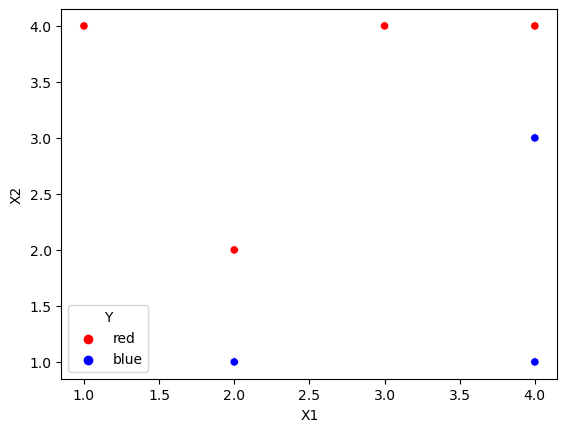

In [211]:
custom_palette = {"red": "red", "blue": "blue"}
sns.scatterplot(x = "X1", y = "X2", hue = "Y", palette=custom_palette, data=data)
plt.show()

(b) $ -0.5 + X_1 - X_2 = 0$  

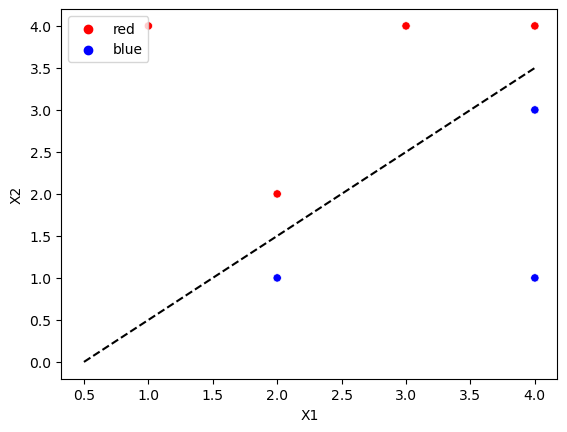

In [214]:
custom_palette = {"red": "red", "blue": "blue"}
sns.scatterplot(x = "X1", y = "X2", hue = "Y", palette=custom_palette, data=data)

sns.lineplot(x=[0.5, 4], y=[0, 3.5], color='black', linestyle='--')
plt.show()

(c) 
<br>
If $ -0.5 + X_1 - X_2 < 0$, Red 
<br>
If $ -0.5 + X_1 - X_2 > 0$, blue 


(d)

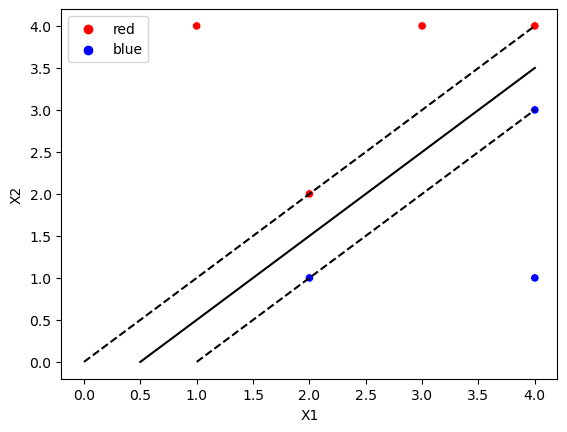

In [217]:
custom_palette = {"red": "red", "blue": "blue"}
sns.scatterplot(x = "X1", y = "X2", hue = "Y", palette=custom_palette, data=data)

sns.lineplot(x=[0.5, 4], y=[0, 3.5], color='black', linestyle='-')
sns.lineplot(x=[0, 4], y=[0, 4], color='black', linestyle='--')
sns.lineplot(x=[1, 4], y=[0, 3], color='black', linestyle='--')
plt.show()

(e)

In [220]:
data[abs(data["X1"] - data["X2"] - 0.5) == 0.5]

X1  X2     Y
1   2   2   red
2   4   4   red
4   2   1  blue
5   4   3  blue

(f) The seventh observation is not one of the the maximal margin classifier. So, a small permutation in its position does not change the optimal boundary.

(g) $ -0.3 + X_1 - X_2 = 0$  

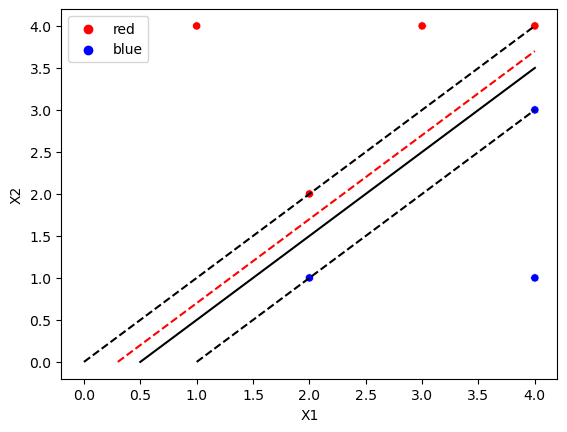

In [222]:
custom_palette = {"red": "red", "blue": "blue"}
sns.scatterplot(x = "X1", y = "X2", hue = "Y", palette=custom_palette, data=data)

sns.lineplot(x=[0.5, 4], y=[0, 3.5], color='black', linestyle='-')
sns.lineplot(x=[0.3, 4], y=[0, 3.7], color='red', linestyle='--') # not the optimal

sns.lineplot(x=[0, 4], y=[0, 4], color='black', linestyle='--')
sns.lineplot(x=[1, 4], y=[0, 3], color='black', linestyle='--')
plt.show()

(h)

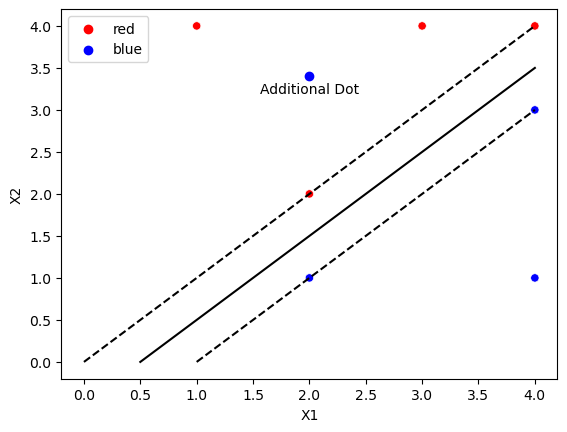

In [242]:
custom_palette = {"red": "red", "blue": "blue"}
sns.scatterplot(x = "X1", y = "X2", hue = "Y", palette=custom_palette, data=data)

sns.lineplot(x=[0.5, 4], y=[0, 3.5], color='black', linestyle='-')
sns.lineplot(x=[0, 4], y=[0, 4], color='black', linestyle='--')
sns.lineplot(x=[1, 4], y=[0, 3], color='black', linestyle='--')

plt.scatter(x = 2,  y = 3.4, color='blue')  # Addition dot
plt.annotate('Additional Dot', xy= (2, 3.2), ha='center')

plt.show()